# BTC Analisis:

### Este archivo:

#### Busca pronosticar las variables del bitcoin en el tiempo. utiliza api https://www.coingecko.com/en/api/documentation, para obtener info de la criptomoneda seleccionada.


### El market_caps:

O "capitalización de mercado" es un término utilizado en el ámbito de las criptomonedas y se refiere al valor total de mercado de una criptomoneda específica en un momento dado. Representa la suma de todos los tokens o monedas de una criptomoneda en circulación multiplicado por el precio actual de cada token.

La capitalización de mercado es una medida importante que se utiliza para evaluar el tamaño y la popularidad de una criptomoneda en comparación con otras. Una capitalización de mercado más alta generalmente indica que una criptomoneda tiene una mayor adopción y valoración en el mercado.

Es importante tener en cuenta que la capitalización de mercado puede fluctuar ampliamente debido a los cambios en el precio de la criptomoneda y en la cantidad de tokens en circulación. También es importante considerar otros factores y métricas al evaluar una criptomoneda, como el volumen de operaciones, la liquidez, la tecnología subyacente y el equipo de desarrollo.

En el contexto del código que proporcionaste, "market_caps" se refiere a los datos de capitalización de mercado históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin.

### Total volumes:

O "volúmenes totales" se refiere al volumen total de transacciones realizadas con una criptomoneda específica en un momento dado. Representa la suma de todos los volúmenes de transacciones en la criptomoneda durante un período de tiempo determinado.

El volumen de transacciones es una métrica importante en el mercado de las criptomonedas, ya que proporciona información sobre la liquidez y la actividad de negociación de una criptomoneda. Un mayor volumen de transacciones generalmente indica una mayor actividad comercial y una mayor liquidez en el mercado, lo que puede ser un indicador de interés y confianza en la criptomoneda.

Es importante tener en cuenta que el volumen de transacciones puede variar ampliamente de un momento a otro y puede influir en la volatilidad de los precios de las criptomonedas. Un alto volumen de transacciones puede indicar una mayor actividad especulativa y comercial, mientras que un bajo volumen puede indicar menor interés o actividad en el mercado.

En el contexto del código que proporcionaste, "total_volumes" se refiere a los datos de volúmenes totales históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin, incluido el volumen total de transacciones.

________________________________________________________

# Api conection to data:

### Monthly data, here we have 1 record per day of the variables

In [449]:
import pandas as pd
import requests

bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})

# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2013-04-28  135.3000  1.500518e+09            0.0
1  2013-04-29  141.9600  1.575032e+09            0.0
2  2013-04-30  135.3000  1.501657e+09            0.0
3  2013-05-01  117.0000  1.298952e+09            0.0
4  2013-05-02  103.4300  1.148668e+09            0.0
5  2013-05-03   91.0100  1.011066e+09            0.0
6  2013-05-04  111.2500  1.236352e+09            0.0
7  2013-05-05  116.7900  1.298378e+09            0.0
8  2013-05-06  118.3300  1.315992e+09            0.0
9  2013-05-07  106.4000  1.183766e+09            0.0
10 2013-05-08  112.6400  1.253655e+09            0.0
11 2013-05-09  113.0000  1.258131e+09            0.0
12 2013-05-10  118.7800  1.322989e+09            0.0
13 2013-05-11  113.0100  1.259239e+09            0.0
14 2013-05-12  114.7130  1.278709e+09            0.0
15 2013-05-13  117.1800  1.306721e+09            0.0
16 2013-05-14  114.5000  1.277279e+09            0.0
17 2013-05-15  114.1560  1.273850e+09         

In [450]:
# Ordenamos los datos, por posibles desordenes internos
df_bit = df_bit.sort_values(by='timestamp').reset_index(drop=True)
df_bit.head()
# Ahora df_sorted contendrá el DataFrame ordenado por la columna "timestamp" en orden ascendente


timestamp  prices   market_caps  total_volumes
0 2013-04-28  135.30  1.500518e+09            0.0
1 2013-04-29  141.96  1.575032e+09            0.0
2 2013-04-30  135.30  1.501657e+09            0.0
3 2013-05-01  117.00  1.298952e+09            0.0
4 2013-05-02  103.43  1.148668e+09            0.0

In [451]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      3739 non-null   datetime64[ns]
 1   prices         3739 non-null   float64       
 2   market_caps    3738 non-null   float64       
 3   total_volumes  3739 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 117.0 KB


In [452]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [453]:
df_bit = df_bit.dropna()

In [454]:
df_bit.drop_duplicates()

timestamp        prices   market_caps  total_volumes
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00
...                  ...           ...           ...            ...
3734 2023-07-21 00:00:00  29787.041530  5.793087e+11   1.111746e+10
3735 2023-07-22 00:00:00  29914.682728  5.813979e+11   8.492628e+09
3736 2023-07-23 00:00:00  29710.155936  5.770685e+11   6.745541e+09
3737 2023-07-24 00:00:00  30057.956719  5.842968e+11   7.427607e+09
3738 2023-07-24 18:54:32  29077.816388  5.654524e+11   1.576299e+10

[3738 rows x 4 columns]

In [455]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3738   3738.000000  3.738000e+03   
mean   2018-06-11 22:28:13.332353280  11913.800572  2.213145e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-20 06:00:00    567.461761  7.311344e+09   
50%              2018-06-12 12:00:00   6332.940357  1.092915e+11   
75%              2021-01-01 18:00:00  17147.437041  3.264666e+11   
max              2023-07-24 18:54:32  67617.015545  1.278798e+12   
std                              NaN  15588.096071  2.954355e+11   

       total_volumes  
count   3.738000e+03  
mean    1.412846e+10  
min     0.000000e+00  
25%     1.312003e+08  
50%     3.568403e+09  
75%     2.423964e+10  
max     1.788941e+11  
std     1.842843e+10

In [456]:
import seaborn as sns

In [457]:
# sns.pairplot(df_bit)

In [458]:

times = pd.to_datetime(df_bit['timestamp']).values
prices = df_bit['prices'].values
market_caps = df_bit['market_caps'].values
total_volumes = df_bit['total_volumes'].values

In [459]:
print(times.__class__)
print(prices.__class__)
print(market_caps.__class__)
print(total_volumes.__class__)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [460]:
prices

array([  135.3       ,   141.96      ,   135.3       , ...,
       29710.15593599, 30057.95671871, 29077.81638806])

### Fin de la revision de los datos.

____________________________________________________________________________________________________________________________________________________

# ok, wait, if we add some dimensions..?

In [461]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = df_bit.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].pct_change() * 100

In [462]:
df_bit

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3734 2023-07-21 00:00:00  29787.041530  5.793087e+11   1.111746e+10   
3735 2023-07-22 00:00:00  29914.682728  5.813979e+11   8.492628e+09   
3736 2023-07-23 00:00:00  29710.155936  5.770685e+11   6.745541e+09   
3737 2023-07-24 00:00:00  30057.956719  5.842968e+11   7.427607e+09   
3738 2023-07-24 18:54:32  29077.816388  5.654524e+11   1.576299e+10   

      prices_diff  prices_incremento  market_caps_diff  \
0             NaN                NaN               NaN   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3734  -132.833308          -0.443963     -2.018610e+09   
3735   127.641198           0.428513      2.089168e+09   
3736  -204.526792          -0.683700     -4.329355e+09   
3737   347.800783           1.170646      7.228271e+09   
3738  -980.140331          -3.260835     -1.884441e+10   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                        NaN                 NaN                       NaN  
1                   4.965914        0.000000e+00                       NaN  
2                  -4.658604        0.000000e+00                       NaN  
3                 -13.498813        0.000000e+00                       NaN  
4                 -11.569625        0.000000e+00                       NaN  
...                      ...                 ...                       ...  
3734               -0.347242        2.571836e+09                 30.095368  
3735                0.360631       -2.624829e+09                -23.609976  
3736               -0.744646       -1.747087e+09                -20.571806  
3737                1.252584        6.820659e+08                 10.111360  
3738               -3.225143        8.335381e+09                112.221624  

[3738 rows x 10 columns]

In [463]:
df_bit = df_bit.fillna(0)

In [464]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3738 entries, 0 to 3738
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3738 non-null   datetime64[ns]
 1   prices                    3738 non-null   float64       
 2   market_caps               3738 non-null   float64       
 3   total_volumes             3738 non-null   float64       
 4   prices_diff               3738 non-null   float64       
 5   prices_incremento         3738 non-null   float64       
 6   market_caps_diff          3738 non-null   float64       
 7   market_caps_incremento    3738 non-null   float64       
 8   total_volumes_diff        3738 non-null   float64       
 9   total_volumes_incremento  3738 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 321.2 KB


In [465]:
# sns.pairplot(df_bit)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [466]:
df_bit.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
dtype: int64

In [467]:
df_bit = df_bit.fillna(0)

In [468]:
import missingno as msno

In [469]:
df_bit = df_bit.drop_duplicates()

In [470]:
df_bit.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
dtype: int64

In [471]:
df_bit.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3738 entries, 0 to 3738
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3738 non-null   datetime64[ns]
 1   prices                    3738 non-null   float64       
 2   market_caps               3738 non-null   float64       
 3   total_volumes             3738 non-null   float64       
 4   prices_diff               3738 non-null   float64       
 5   prices_incremento         3738 non-null   float64       
 6   market_caps_diff          3738 non-null   float64       
 7   market_caps_incremento    3738 non-null   float64       
 8   total_volumes_diff        3738 non-null   float64       
 9   total_volumes_incremento  3738 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 321.2 KB


#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

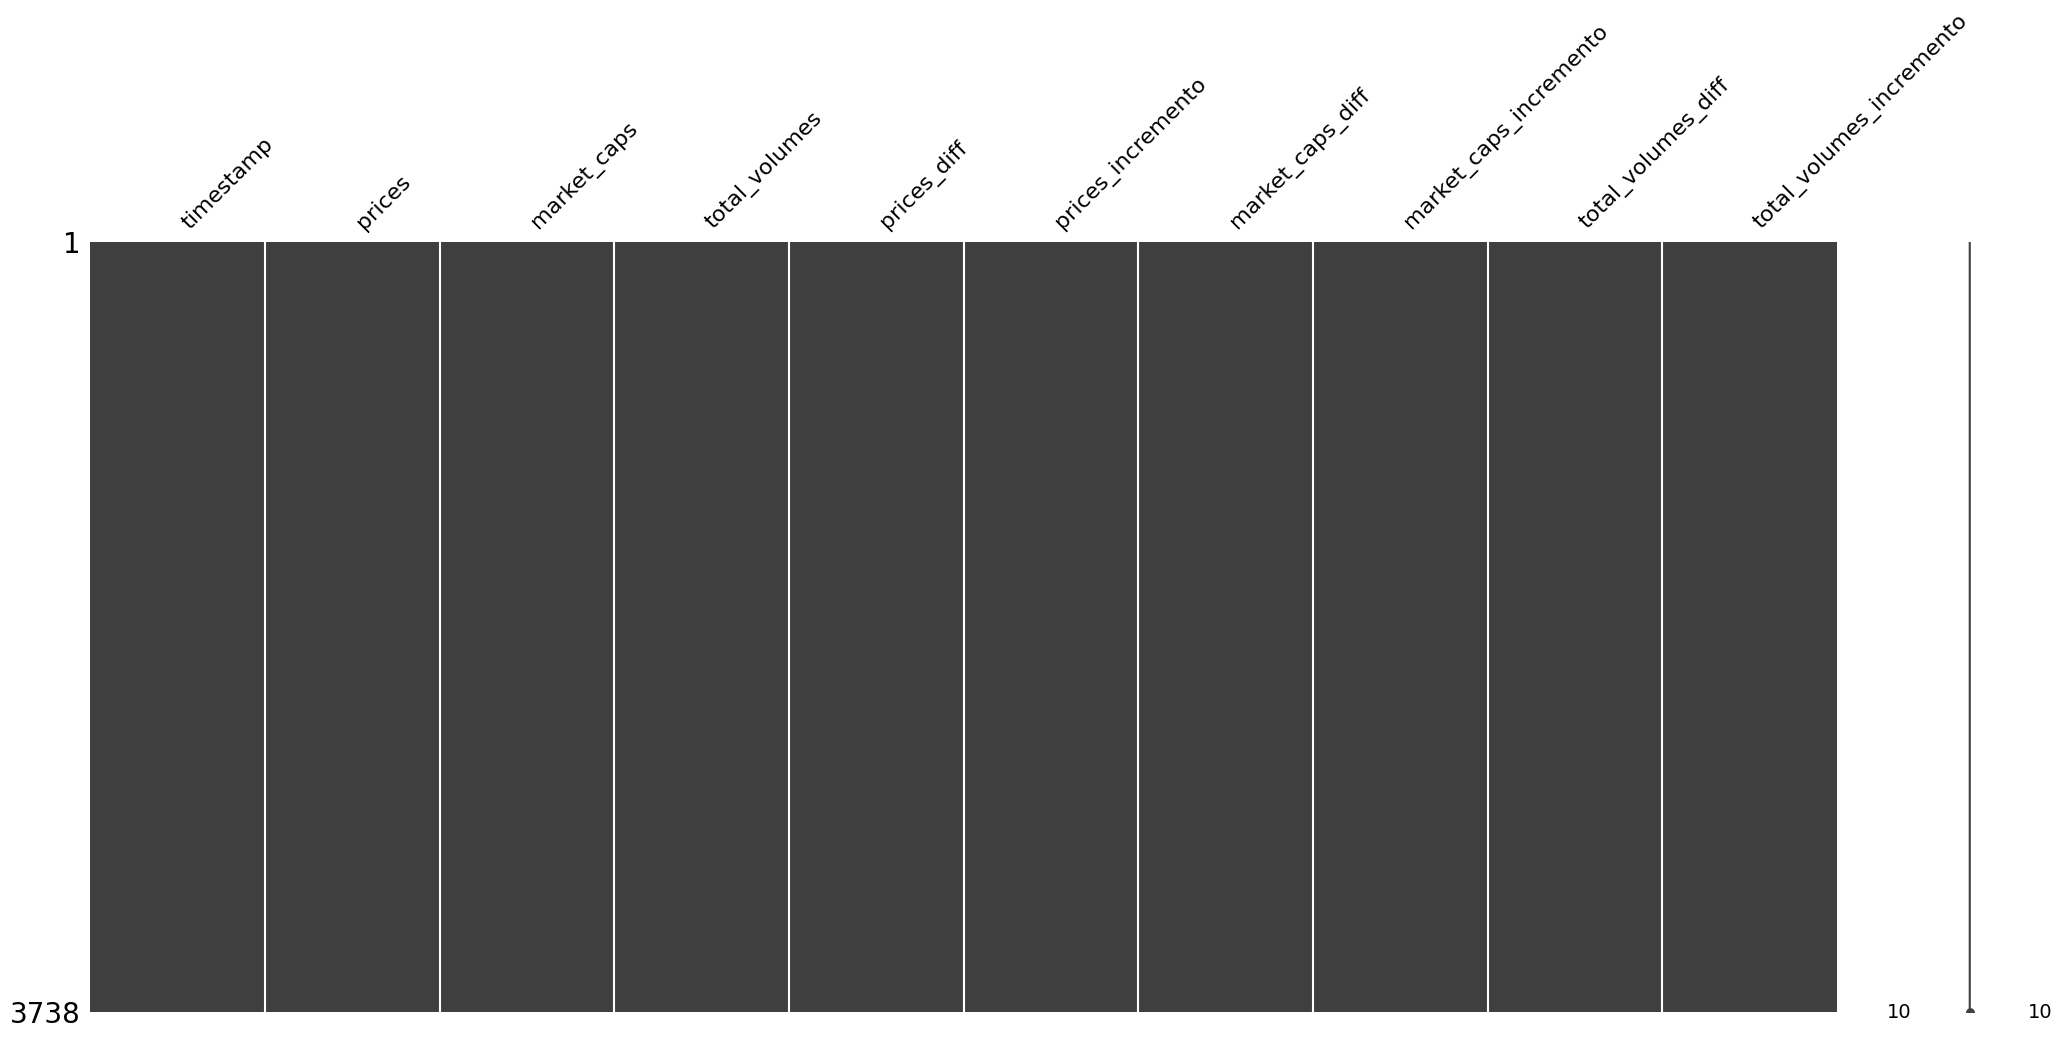

In [472]:
import missingno as msno
# Visualizar los valores nulos utilizando missingno
msno.matrix(df_bit)

In [473]:
# import seaborn as sns
# sns.pairplot(df_bit)

In [474]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3738   3738.000000  3.738000e+03   
mean   2018-06-11 22:28:13.332353280  11913.800572  2.213145e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-20 06:00:00    567.461761  7.311344e+09   
50%              2018-06-12 12:00:00   6332.940357  1.092915e+11   
75%              2021-01-01 18:00:00  17147.437041  3.264666e+11   
max              2023-07-24 18:54:32  67617.015545  1.278798e+12   
std                              NaN  15588.096071  2.954355e+11   

       total_volumes  prices_diff  prices_incremento  market_caps_diff  \
count   3.738000e+03  3738.000000        3738.000000      3.738000e+03   
mean    1.412846e+10     7.742781           0.224101      1.508699e+08   
min     0.000000e+00 -6924.210173         -35.190269     -1.294806e+11   
25%     1.312003e+08   -44.890277          -1.333308     -7.249382e+08   
50%     3.568403e+09     1.144150           0.158703      1.770233e+07   
75%     2.423964e+10    68.461201           1.824236      1.200787e+09   
max     1.788941e+11  7474.233857          33.255625      1.389789e+11   
std     1.842843e+10   732.933220           4.000700      1.364953e+10   

       market_caps_incremento  total_volumes_diff  total_volumes_incremento  
count             3738.000000        3.738000e+03               3738.000000  
mean                 0.239072        4.216958e+06                       inf  
min                -35.775702       -1.042369e+11                -99.592742  
25%                 -1.282390       -5.750931e+08                -15.426614  
50%                  0.184851        0.000000e+00                  0.000000  
75%                  1.825545        4.947949e+08                 16.288399  
max                 33.272357        1.216206e+11                       inf  
std                  3.998089        7.025723e+09                       NaN

In [475]:
df_bit.tail()


timestamp        prices   market_caps  total_volumes  \
3734 2023-07-21 00:00:00  29787.041530  5.793087e+11   1.111746e+10   
3735 2023-07-22 00:00:00  29914.682728  5.813979e+11   8.492628e+09   
3736 2023-07-23 00:00:00  29710.155936  5.770685e+11   6.745541e+09   
3737 2023-07-24 00:00:00  30057.956719  5.842968e+11   7.427607e+09   
3738 2023-07-24 18:54:32  29077.816388  5.654524e+11   1.576299e+10   

      prices_diff  prices_incremento  market_caps_diff  \
3734  -132.833308          -0.443963     -2.018610e+09   
3735   127.641198           0.428513      2.089168e+09   
3736  -204.526792          -0.683700     -4.329355e+09   
3737   347.800783           1.170646      7.228271e+09   
3738  -980.140331          -3.260835     -1.884441e+10   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
3734               -0.347242        2.571836e+09                 30.095368  
3735                0.360631       -2.624829e+09                -23.609976  
3736               -0.744646       -1.747087e+09                -20.571806  
3737                1.252584        6.820659e+08                 10.111360  
3738               -3.225143        8.335381e+09                112.221624

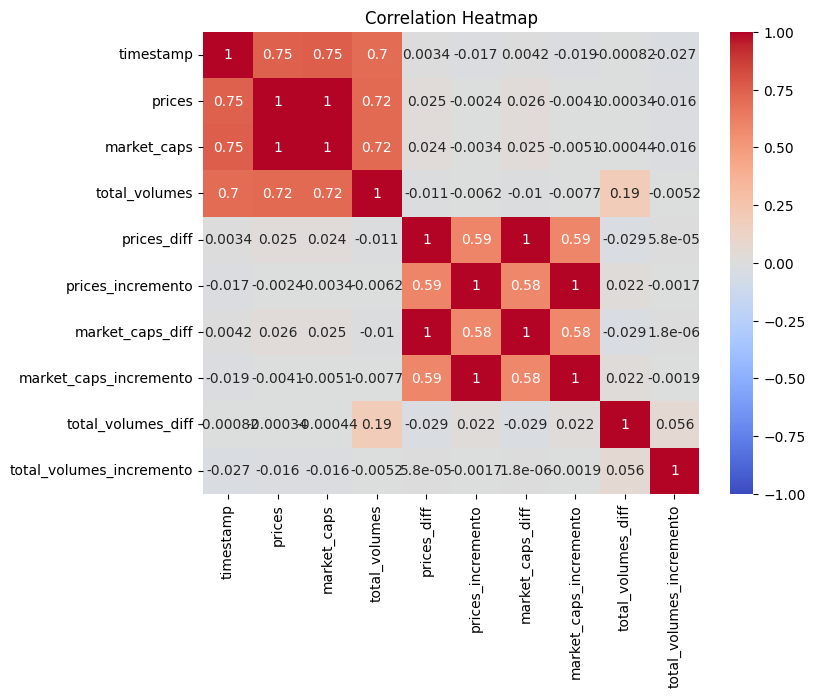

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.748821     0.751687       0.701147   
prices                     0.748821  1.000000     0.999708       0.718479   
market_caps                0.751687  0.999708     1.000000       0.716911   
total_volumes              0.701147  0.718479     0.716911       1.000000   
prices_diff                0.003413  0.025337     0.024257      -0.010923   
prices_incremento         -0.016515 -0.002403    -0.003435      -0.006215   
market_caps_diff           0.004229  0.026388     0.025430      -0.010200   
market_caps_incremento    -0.018981 -0.004079    -0.005053      -0.007743   
total_volumes_diff        -0.000823 -0.000341    -0.000438       0.190418   
total_volumes_incremento  -0.026663 -0.015778    -0.015690      -0.005203   

                          prices_diff  prices_incremento  market_caps_diff  \
timestamp                    0.003413          -0.016515          0.004229

In [476]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_bit.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

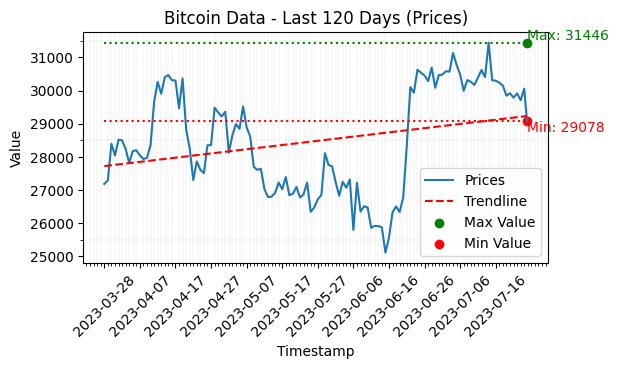

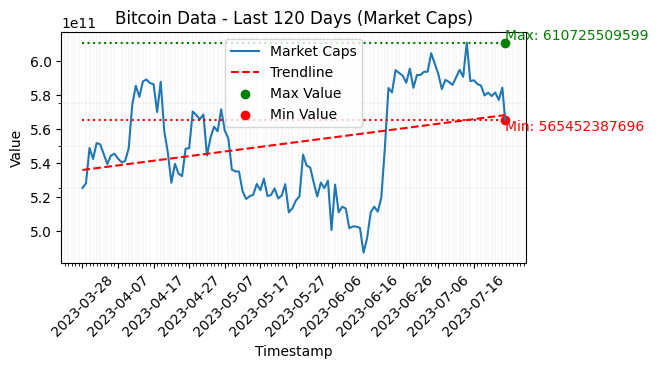

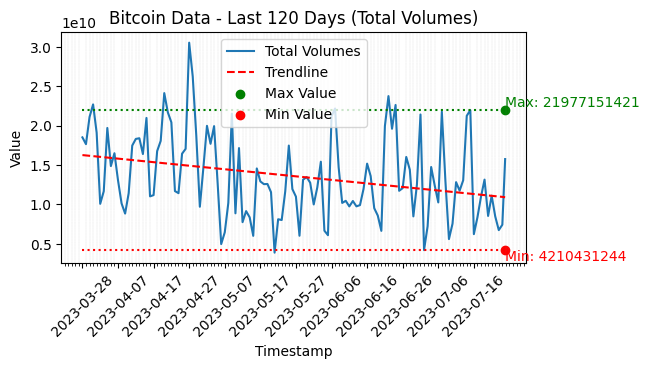

In [477]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = df_bit.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(6, 3))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(6, 3))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(6, 3))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


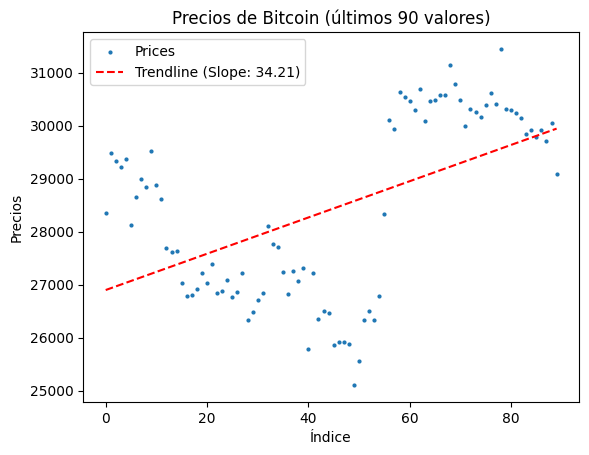

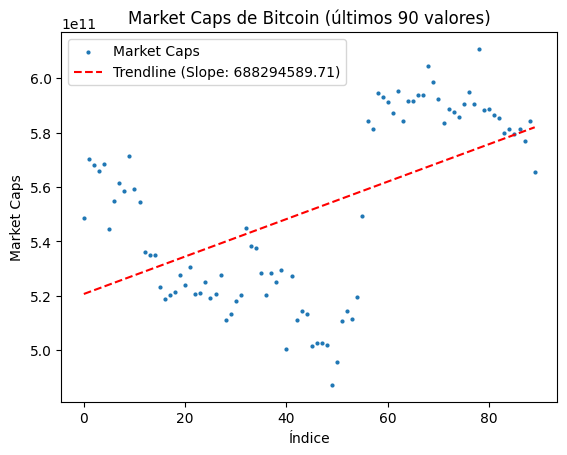

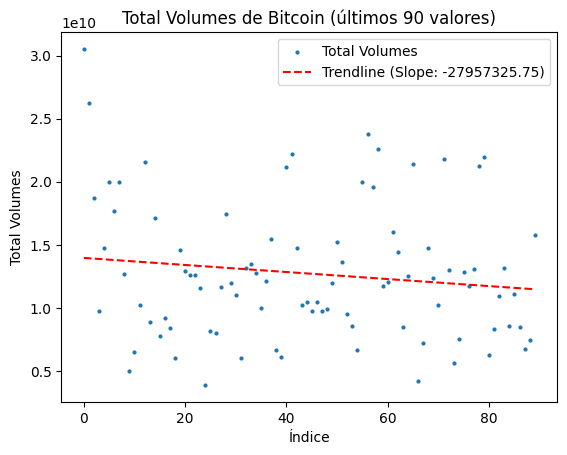

In [478]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = df_bit['prices'].tail(90)
last_90_market_caps = df_bit['market_caps'].tail(90)
last_90_total_volumes = df_bit['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()

## Creo copya para Random forest inseertion

In [479]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming you already have the DataFrame df_bit loaded with the data


# Min-Max Normalization
cols_to_normalize = ['prices', 'market_caps', 'total_volumes', 'prices_diff', 'prices_incremento',
                     'market_caps_diff', 'market_caps_incremento', 'total_volumes_diff', 'total_volumes_incremento']

df_bit_normalized = df_bit.copy()
df_bit_normalized[cols_to_normalize] = (df_bit[cols_to_normalize] - df_bit[cols_to_normalize].min()) / (df_bit[cols_to_normalize].max() - df_bit[cols_to_normalize].min())

print(df_bit_normalized)


               timestamp    prices  market_caps  total_volumes  prices_diff  \
0    2013-04-28 00:00:00  0.000999     0.000571       0.000000     0.480900   
1    2013-04-29 00:00:00  0.001098     0.000629       0.000000     0.481362   
2    2013-04-30 00:00:00  0.000999     0.000571       0.000000     0.480437   
3    2013-05-01 00:00:00  0.000728     0.000413       0.000000     0.479629   
4    2013-05-02 00:00:00  0.000527     0.000295       0.000000     0.479957   
...                  ...       ...          ...            ...          ...   
3734 2023-07-21 00:00:00  0.439964     0.452680       0.062145     0.471674   
3735 2023-07-22 00:00:00  0.441854     0.454315       0.047473     0.489765   
3736 2023-07-23 00:00:00  0.438826     0.450927       0.037707     0.466695   
3737 2023-07-24 00:00:00  0.443975     0.456583       0.041520     0.505055   
3738 2023-07-24 18:54:32  0.429465     0.441838       0.088114     0.412827   

      prices_incremento  market_caps_diff  market_c

In [480]:
# Chequeo proporciones de los datos ahora normalizados.... O.K.
# import seaborn as sns
# sns.pairplot(df_bit_normalized)

__________________________________________

# Transpuesta

In [481]:
df_bit_t = df_bit.T

In [482]:
df_bit_t

0                    1     \
timestamp                 2013-04-28 00:00:00  2013-04-29 00:00:00   
prices                                  135.3               141.96   
market_caps                      1500517590.0         1575032004.0   
total_volumes                             0.0                  0.0   
prices_diff                               0.0                 6.66   
prices_incremento                         0.0             4.922395   
market_caps_diff                          0.0           74514414.0   
market_caps_incremento                    0.0             4.965914   
total_volumes_diff                        0.0                  0.0   
total_volumes_incremento                  0.0                  0.0   

                                         2                    3     \
timestamp                 2013-04-30 00:00:00  2013-05-01 00:00:00   
prices                                  135.3                117.0   
market_caps                      1501657493.0         1298951550.0   
total_volumes                             0.0                  0.0   
prices_diff                             -6.66                -18.3   
prices_incremento                   -4.691462           -13.525499   
market_caps_diff                  -73374511.0         -202705943.0   
market_caps_incremento              -4.658604           -13.498813   
total_volumes_diff                        0.0                  0.0   
total_volumes_incremento                  0.0                  0.0   

                                         4                    5     \
timestamp                 2013-05-02 00:00:00  2013-05-03 00:00:00   
prices                                 103.43                91.01   
market_caps                      1148667722.0         1011066494.0   
total_volumes                             0.0                  0.0   
prices_diff                            -13.57               -12.42   
prices_incremento                  -11.598291           -12.008121   
market_caps_diff                 -150283828.0         -137601228.0   
market_caps_incremento             -11.569625           -11.979202   
total_volumes_diff                        0.0                  0.0   
total_volumes_incremento                  0.0                  0.0   

                                         6                    7     \
timestamp                 2013-05-04 00:00:00  2013-05-05 00:00:00   
prices                                 111.25               116.79   
market_caps                      1236351844.0         1298377788.0   
total_volumes                             0.0                  0.0   
prices_diff                             20.24                 5.54   
prices_incremento                   22.239314             4.979775   
market_caps_diff                  225285350.0           62025944.0   
market_caps_incremento              22.281952             5.016852   
total_volumes_diff                        0.0                  0.0   
total_volumes_incremento                  0.0                  0.0   

                                         8                    9     ...  \
timestamp                 2013-05-06 00:00:00  2013-05-07 00:00:00  ...   
prices                                 118.33                106.4  ...   
market_caps                      1315992304.0         1183766500.0  ...   
total_volumes                             0.0                  0.0  ...   
prices_diff                              1.54               -11.93  ...   
prices_incremento                    1.318606           -10.081974  ...   
market_caps_diff                   17614516.0         -132225804.0  ...   
market_caps_incremento               1.356656           -10.047612  ...   
total_volumes_diff                        0.0                  0.0  ...   
total_volumes_incremento                  0.0                  0.0  ...   

                                         3729                 3730  \
timestamp                 2023-07-16 00:00:00  2023-07-17 00:

In [483]:
# Almacenar los índices en una variable
indices = df_bit_t.index

In [484]:
# Almacenar los nombres de las filas en una variable
df_bit_t_row_names = df_bit_t.index

# Eliminar los nombres de las filas del índice del DataFrame
df_bit_t.reset_index(drop=True, inplace=True)

# Imprimir los nombres de las filas
print(df_bit_t_row_names)

Index(['timestamp', 'prices', 'market_caps', 'total_volumes', 'prices_diff',
       'prices_incremento', 'market_caps_diff', 'market_caps_incremento',
       'total_volumes_diff', 'total_volumes_incremento'],
      dtype='object')


In [485]:
df_bit_t

0                    1                    2     \
0  2013-04-28 00:00:00  2013-04-29 00:00:00  2013-04-30 00:00:00   
1                135.3               141.96                135.3   
2         1500517590.0         1575032004.0         1501657493.0   
3                  0.0                  0.0                  0.0   
4                  0.0                 6.66                -6.66   
5                  0.0             4.922395            -4.691462   
6                  0.0           74514414.0          -73374511.0   
7                  0.0             4.965914            -4.658604   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

                  3                    4                    5     \
0  2013-05-01 00:00:00  2013-05-02 00:00:00  2013-05-03 00:00:00   
1                117.0               103.43                91.01   
2         1298951550.0         1148667722.0         1011066494.0   
3                  0.0                  0.0                  0.0   
4                -18.3               -13.57               -12.42   
5           -13.525499           -11.598291           -12.008121   
6         -202705943.0         -150283828.0         -137601228.0   
7           -13.498813           -11.569625           -11.979202   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

                  6                    7                    8     \
0  2013-05-04 00:00:00  2013-05-05 00:00:00  2013-05-06 00:00:00   
1               111.25               116.79               118.33   
2         1236351844.0         1298377788.0         1315992304.0   
3                  0.0                  0.0                  0.0   
4                20.24                 5.54                 1.54   
5            22.239314             4.979775             1.318606   
6          225285350.0           62025944.0           17614516.0   
7            22.281952             5.016852             1.356656   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

                  9     ...                 3729                 3730  \
0  2013-05-07 00:00:00  ...  2023-07-16 00:00:00  2023-07-17 00:00:00   
1                106.4  ...           30297.9714         30237.334785   
2         1183766500.0  ...  588642134563.520386  586391434733.715332   
3                  0.0  ...    6233916918.782722    8356410453.563714   
4               -11.93  ...           -13.856408           -60.636615   
5           -10.081974  ...            -0.045713            -0.200134   
6         -132225804.0  ...     534687313.387695   -2250699829.805054   
7           -10.047612  ...             0.090917            -0.382355   
8                  0.0  ...   -15743234502.07053    2122493534.780992   
9                  0.0  ...           -71.634554            34.047511   

                  3731                 3732                 3733  \
0  2023-07-18 00:00:00  2023-07-19 00:00:00  2023-07-20 00:00:00   
1         30147.860079         29848.032273         29919.874838   
2  585500720965.111328  579708613537.516479  581327322356.871582   
3   10974383371.546566   13152758553.030825    8545620844.326587   
4           -89.474706          -299.827807            71.842566   
5            -0.295908            -0.994524             0.240694   
6    -890713768.604004   -5792107427.594849    1618708819.355103   
7            -0.151897            -0.989257             0.279228   
8    2617972917.982852    2178375181.484259   -4607137708.704238   
9            31.328917            19.849636            -35.02792   

                  3734                 3735                 3736  \
0  2023-07-21 00:00:00  2023-07-22 00:00:00  2023-07-23 00:00:00   
1          29787.04153         29914.682728         29710.155936   
2  57930871261

In [486]:
# Almacenar la primera fila en una variable
primera_fila = df_bit_t.iloc[0]

# Eliminar la primera fila del DataFrame
df_bit_t = df_bit_t.iloc[1:]

print(primera_fila)

0       2013-04-28 00:00:00
1       2013-04-29 00:00:00
2       2013-04-30 00:00:00
3       2013-05-01 00:00:00
4       2013-05-02 00:00:00
               ...         
3734    2023-07-21 00:00:00
3735    2023-07-22 00:00:00
3736    2023-07-23 00:00:00
3737    2023-07-24 00:00:00
3738    2023-07-24 18:54:32
Name: 0, Length: 3738, dtype: object


In [487]:
df_bit_t

0             1             2             3             4     \
1         135.3        141.96         135.3         117.0        103.43   
2  1500517590.0  1575032004.0  1501657493.0  1298951550.0  1148667722.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0          6.66         -6.66         -18.3        -13.57   
5           0.0      4.922395     -4.691462    -13.525499    -11.598291   
6           0.0    74514414.0   -73374511.0  -202705943.0  -150283828.0   
7           0.0      4.965914     -4.658604    -13.498813    -11.569625   
8           0.0           0.0           0.0           0.0           0.0   
9           0.0           0.0           0.0           0.0           0.0   

           5             6             7             8             9     ...  \
1         91.01        111.25        116.79        118.33         106.4  ...   
2  1011066494.0  1236351844.0  1298377788.0  1315992304.0  1183766500.0  ...   
3           0.0           0.0           0.0           0.0           0.0  ...   
4        -12.42         20.24          5.54          1.54        -11.93  ...   
5    -12.008121     22.239314      4.979775      1.318606    -10.081974  ...   
6  -137601228.0   225285350.0    62025944.0    17614516.0  -132225804.0  ...   
7    -11.979202     22.281952      5.016852      1.356656    -10.047612  ...   
8           0.0           0.0           0.0           0.0           0.0  ...   
9           0.0           0.0           0.0           0.0           0.0  ...   

                  3729                 3730                 3731  \
1           30297.9714         30237.334785         30147.860079   
2  588642134563.520386  586391434733.715332  585500720965.111328   
3    6233916918.782722    8356410453.563714   10974383371.546566   
4           -13.856408           -60.636615           -89.474706   
5            -0.045713            -0.200134            -0.295908   
6     534687313.387695   -2250699829.805054    -890713768.604004   
7             0.090917            -0.382355            -0.151897   
8   -15743234502.07053    2122493534.780992    2617972917.982852   
9           -71.634554            34.047511            31.328917   

                  3732                 3733                 3734  \
1         29848.032273         29919.874838          29787.04153   
2  579708613537.516479  581327322356.871582  579308712612.258057   
3   13152758553.030825    8545620844.326587   11117456853.464512   
4          -299.827807            71.842566          -132.833308   
5            -0.994524             0.240694            -0.443963   
6   -5792107427.594849    1618708819.355103   -2018609744.613525   
7            -0.989257             0.279228            -0.347242   
8    2178375181.484259   -4607137708.704238    2571836009.137925   
9            19.849636            -35.02792            30.095368   

                  3735                 3736                 3737  \
1         29914.682728         29710.155936         30057.956719   
2  581397880391.417236  577068525402.119019  584296796267.481689   
3      8492627980.9282    6745541064.873876    7427606999.412798   
4           127.641198          -204.526792           347.800783   
5             0.428513              -0.6837             1.170646   
6     2089167779.15918   -4329354989.298218    7228270865.362671   
7             0.360631            -0.744646             1.252584   
8   -2624828872.536312   -1747086916.054324     682065934.538922   
9           -23.609976           -20.571806             10.11136   

                  3738  
1         29077.816388  
2  565452387695.510132  
3   15762988169.673651  
4          -980.140331  
5            -3.260835  
6  -18844408571.971558  
7            -3.225143  
8    8335381170.260853  
9           112.221624  

[9 rows x 3738 columns]

_____________________________________________

# Random Forest - Arbol de decision.

In [488]:
df_bit

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3734 2023-07-21 00:00:00  29787.041530  5.793087e+11   1.111746e+10   
3735 2023-07-22 00:00:00  29914.682728  5.813979e+11   8.492628e+09   
3736 2023-07-23 00:00:00  29710.155936  5.770685e+11   6.745541e+09   
3737 2023-07-24 00:00:00  30057.956719  5.842968e+11   7.427607e+09   
3738 2023-07-24 18:54:32  29077.816388  5.654524e+11   1.576299e+10   

      prices_diff  prices_incremento  market_caps_diff  \
0        0.000000           0.000000      0.000000e+00   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3734  -132.833308          -0.443963     -2.018610e+09   
3735   127.641198           0.428513      2.089168e+09   
3736  -204.526792          -0.683700     -4.329355e+09   
3737   347.800783           1.170646      7.228271e+09   
3738  -980.140331          -3.260835     -1.884441e+10   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                   0.000000        0.000000e+00                  0.000000  
1                   4.965914        0.000000e+00                  0.000000  
2                  -4.658604        0.000000e+00                  0.000000  
3                 -13.498813        0.000000e+00                  0.000000  
4                 -11.569625        0.000000e+00                  0.000000  
...                      ...                 ...                       ...  
3734               -0.347242        2.571836e+09                 30.095368  
3735                0.360631       -2.624829e+09                -23.609976  
3736               -0.744646       -1.747087e+09                -20.571806  
3737                1.252584        6.820659e+08                 10.111360  
3738               -3.225143        8.335381e+09                112.221624  

[3738 rows x 10 columns]

In [489]:
df_bit_normalized

timestamp    prices  market_caps  total_volumes  prices_diff  \
0    2013-04-28 00:00:00  0.000999     0.000571       0.000000     0.480900   
1    2013-04-29 00:00:00  0.001098     0.000629       0.000000     0.481362   
2    2013-04-30 00:00:00  0.000999     0.000571       0.000000     0.480437   
3    2013-05-01 00:00:00  0.000728     0.000413       0.000000     0.479629   
4    2013-05-02 00:00:00  0.000527     0.000295       0.000000     0.479957   
...                  ...       ...          ...            ...          ...   
3734 2023-07-21 00:00:00  0.439964     0.452680       0.062145     0.471674   
3735 2023-07-22 00:00:00  0.441854     0.454315       0.047473     0.489765   
3736 2023-07-23 00:00:00  0.438826     0.450927       0.037707     0.466695   
3737 2023-07-24 00:00:00  0.443975     0.456583       0.041520     0.505055   
3738 2023-07-24 18:54:32  0.429465     0.441838       0.088114     0.412827   

      prices_incremento  market_caps_diff  market_caps_incremento  \
0              0.514133          0.482309                0.518128   
1              0.586049          0.482587                0.590047   
2              0.445590          0.482036                0.450659   
3              0.316524          0.481554                0.322629   
4              0.344681          0.481750                0.350569   
...                 ...               ...                     ...   
3734           0.507646          0.474790                0.513099   
3735           0.520393          0.490092                0.523350   
3736           0.504144          0.466183                0.507343   
3737           0.531236          0.509234                0.536268   
3738           0.466492          0.412115                0.471419   

      total_volumes_diff  total_volumes_incremento  
0               0.461516                       0.0  
1               0.461516                       0.0  
2               0.461516                       0.0  
3               0.461516                       0.0  
4               0.461516                       0.0  
...                  ...                       ...  
3734            0.472903                       0.0  
3735            0.449895                       0.0  
3736            0.453781                       0.0  
3737            0.464536                       0.0  
3738            0.498422                       0.0  

[3738 rows x 10 columns]

### Revisar `Normalizacion de los Datos`, ambos, `x` e `y` ✅
### cONTINUO AJUSTANDO ESTE CODIGO


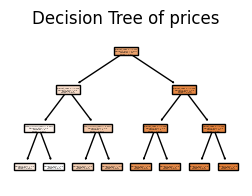

X: [[0.41289677 0.05590519 0.44836623 0.48943798 0.44897231 0.49400924
  0.44927247 0.        ]
 [0.40648651 0.06795131 0.45163472 0.491537   0.45179284 0.4956759
  0.47105749 0.        ]
 [0.41293167 0.08624179 0.51032242 0.53720666 0.51299224 0.54105689
  0.47600343 0.        ]
 [0.41034987 0.03730297 0.46830348 0.50440777 0.47001861 0.50908571
  0.42275339 0.        ]
 [0.41380888 0.03408747 0.49819872 0.52757747 0.4987764  0.53031766
  0.45896928 0.        ]
 [0.39108932 0.11855303 0.37513628 0.43268171 0.3741509  0.43872845
  0.52841846 0.        ]
 [0.41198223 0.12402881 0.57979943 0.59479429 0.58177215 0.59537816
  0.46585334 0.        ]
 [0.39921593 0.08230488 0.42045093 0.4674105  0.42153431 0.47331504
  0.42846806 0.        ]
 [0.4017976  0.05700538 0.49212787 0.52309767 0.49459973 0.52747912
  0.4414773  0.        ]
 [0.4009735  0.05849309 0.47823792 0.51202016 0.47838631 0.51516159
  0.46269452 0.        ]
 [0.3919187  0.05453298 0.43843289 0.48038274 0.43920323 0.48547187


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


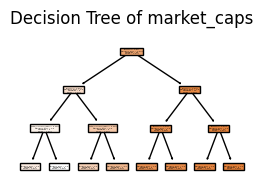

X: [[0.40233878 0.05590519 0.44836623 0.48943798 0.44897231 0.49400924
  0.44927247 0.        ]
 [0.39610077 0.06795131 0.45163472 0.491537   0.45179284 0.4956759
  0.47105749 0.        ]
 [0.40237232 0.08624179 0.51032242 0.53720666 0.51299224 0.54105689
  0.47600343 0.        ]
 [0.39968733 0.03730297 0.46830348 0.50440777 0.47001861 0.50908571
  0.42275339 0.        ]
 [0.40337467 0.03408747 0.49819872 0.52757747 0.4987764  0.53031766
  0.45896928 0.        ]
 [0.38083063 0.11855303 0.37513628 0.43268171 0.3741509  0.43872845
  0.52841846 0.        ]
 [0.40191155 0.12402881 0.57979943 0.59479429 0.58177215 0.59537816
  0.46585334 0.        ]
 [0.38902656 0.08230488 0.42045093 0.4674105  0.42153431 0.47331504
  0.42846806 0.        ]
 [0.39141986 0.05700538 0.49212787 0.52309767 0.49459973 0.52747912
  0.4414773  0.        ]
 [0.39085245 0.05849309 0.47823792 0.51202016 0.47838631 0.51516159
  0.46269452 0.        ]
 [0.3818004  0.05453298 0.43843289 0.48038274 0.43920323 0.48547187


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


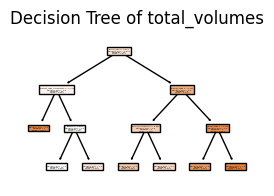

X: [[0.40233878 0.41289677 0.44836623 0.48943798 0.44897231 0.49400924
  0.44927247 0.        ]
 [0.39610077 0.40648651 0.45163472 0.491537   0.45179284 0.4956759
  0.47105749 0.        ]
 [0.40237232 0.41293167 0.51032242 0.53720666 0.51299224 0.54105689
  0.47600343 0.        ]
 [0.39968733 0.41034987 0.46830348 0.50440777 0.47001861 0.50908571
  0.42275339 0.        ]
 [0.40337467 0.41380888 0.49819872 0.52757747 0.4987764  0.53031766
  0.45896928 0.        ]
 [0.38083063 0.39108932 0.37513628 0.43268171 0.3741509  0.43872845
  0.52841846 0.        ]
 [0.40191155 0.41198223 0.57979943 0.59479429 0.58177215 0.59537816
  0.46585334 0.        ]
 [0.38902656 0.39921593 0.42045093 0.4674105  0.42153431 0.47331504
  0.42846806 0.        ]
 [0.39141986 0.4017976  0.49212787 0.52309767 0.49459973 0.52747912
  0.4414773  0.        ]
 [0.39085245 0.4009735  0.47823792 0.51202016 0.47838631 0.51516159
  0.46269452 0.        ]
 [0.3818004  0.3919187  0.43843289 0.48038274 0.43920323 0.48547187


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


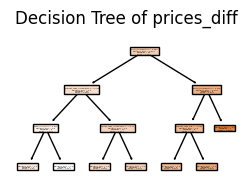

X: [[0.40233878 0.41289677 0.05590519 0.48943798 0.44897231 0.49400924
  0.44927247 0.        ]
 [0.39610077 0.40648651 0.06795131 0.491537   0.45179284 0.4956759
  0.47105749 0.        ]
 [0.40237232 0.41293167 0.08624179 0.53720666 0.51299224 0.54105689
  0.47600343 0.        ]
 [0.39968733 0.41034987 0.03730297 0.50440777 0.47001861 0.50908571
  0.42275339 0.        ]
 [0.40337467 0.41380888 0.03408747 0.52757747 0.4987764  0.53031766
  0.45896928 0.        ]
 [0.38083063 0.39108932 0.11855303 0.43268171 0.3741509  0.43872845
  0.52841846 0.        ]
 [0.40191155 0.41198223 0.12402881 0.59479429 0.58177215 0.59537816
  0.46585334 0.        ]
 [0.38902656 0.39921593 0.08230488 0.4674105  0.42153431 0.47331504
  0.42846806 0.        ]
 [0.39141986 0.4017976  0.05700538 0.52309767 0.49459973 0.52747912
  0.4414773  0.        ]
 [0.39085245 0.4009735  0.05849309 0.51202016 0.47838631 0.51516159
  0.46269452 0.        ]
 [0.3818004  0.3919187  0.05453298 0.48038274 0.43920323 0.48547187


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


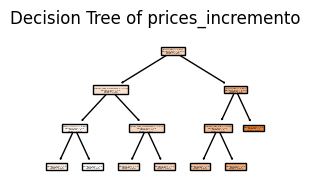

X: [[0.40233878 0.41289677 0.05590519 0.44836623 0.44897231 0.49400924
  0.44927247 0.        ]
 [0.39610077 0.40648651 0.06795131 0.45163472 0.45179284 0.4956759
  0.47105749 0.        ]
 [0.40237232 0.41293167 0.08624179 0.51032242 0.51299224 0.54105689
  0.47600343 0.        ]
 [0.39968733 0.41034987 0.03730297 0.46830348 0.47001861 0.50908571
  0.42275339 0.        ]
 [0.40337467 0.41380888 0.03408747 0.49819872 0.4987764  0.53031766
  0.45896928 0.        ]
 [0.38083063 0.39108932 0.11855303 0.37513628 0.3741509  0.43872845
  0.52841846 0.        ]
 [0.40191155 0.41198223 0.12402881 0.57979943 0.58177215 0.59537816
  0.46585334 0.        ]
 [0.38902656 0.39921593 0.08230488 0.42045093 0.42153431 0.47331504
  0.42846806 0.        ]
 [0.39141986 0.4017976  0.05700538 0.49212787 0.49459973 0.52747912
  0.4414773  0.        ]
 [0.39085245 0.4009735  0.05849309 0.47823792 0.47838631 0.51516159
  0.46269452 0.        ]
 [0.3818004  0.3919187  0.05453298 0.43843289 0.43920323 0.48547187


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


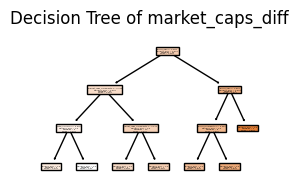

X: [[0.40233878 0.41289677 0.05590519 0.44836623 0.48943798 0.49400924
  0.44927247 0.        ]
 [0.39610077 0.40648651 0.06795131 0.45163472 0.491537   0.4956759
  0.47105749 0.        ]
 [0.40237232 0.41293167 0.08624179 0.51032242 0.53720666 0.54105689
  0.47600343 0.        ]
 [0.39968733 0.41034987 0.03730297 0.46830348 0.50440777 0.50908571
  0.42275339 0.        ]
 [0.40337467 0.41380888 0.03408747 0.49819872 0.52757747 0.53031766
  0.45896928 0.        ]
 [0.38083063 0.39108932 0.11855303 0.37513628 0.43268171 0.43872845
  0.52841846 0.        ]
 [0.40191155 0.41198223 0.12402881 0.57979943 0.59479429 0.59537816
  0.46585334 0.        ]
 [0.38902656 0.39921593 0.08230488 0.42045093 0.4674105  0.47331504
  0.42846806 0.        ]
 [0.39141986 0.4017976  0.05700538 0.49212787 0.52309767 0.52747912
  0.4414773  0.        ]
 [0.39085245 0.4009735  0.05849309 0.47823792 0.51202016 0.51516159
  0.46269452 0.        ]
 [0.3818004  0.3919187  0.05453298 0.43843289 0.48038274 0.48547187


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


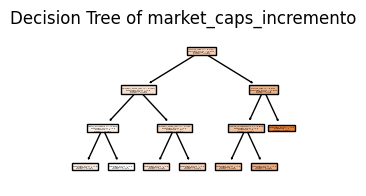

X: [[0.40233878 0.41289677 0.05590519 0.44836623 0.48943798 0.44897231
  0.44927247 0.        ]
 [0.39610077 0.40648651 0.06795131 0.45163472 0.491537   0.45179284
  0.47105749 0.        ]
 [0.40237232 0.41293167 0.08624179 0.51032242 0.53720666 0.51299224
  0.47600343 0.        ]
 [0.39968733 0.41034987 0.03730297 0.46830348 0.50440777 0.47001861
  0.42275339 0.        ]
 [0.40337467 0.41380888 0.03408747 0.49819872 0.52757747 0.4987764
  0.45896928 0.        ]
 [0.38083063 0.39108932 0.11855303 0.37513628 0.43268171 0.3741509
  0.52841846 0.        ]
 [0.40191155 0.41198223 0.12402881 0.57979943 0.59479429 0.58177215
  0.46585334 0.        ]
 [0.38902656 0.39921593 0.08230488 0.42045093 0.4674105  0.42153431
  0.42846806 0.        ]
 [0.39141986 0.4017976  0.05700538 0.49212787 0.52309767 0.49459973
  0.4414773  0.        ]
 [0.39085245 0.4009735  0.05849309 0.47823792 0.51202016 0.47838631
  0.46269452 0.        ]
 [0.3818004  0.3919187  0.05453298 0.43843289 0.48038274 0.43920323
 

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


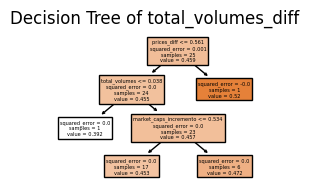

X: [[0.40233878 0.41289677 0.05590519 0.44836623 0.48943798 0.44897231
  0.49400924 0.        ]
 [0.39610077 0.40648651 0.06795131 0.45163472 0.491537   0.45179284
  0.4956759  0.        ]
 [0.40237232 0.41293167 0.08624179 0.51032242 0.53720666 0.51299224
  0.54105689 0.        ]
 [0.39968733 0.41034987 0.03730297 0.46830348 0.50440777 0.47001861
  0.50908571 0.        ]
 [0.40337467 0.41380888 0.03408747 0.49819872 0.52757747 0.4987764
  0.53031766 0.        ]
 [0.38083063 0.39108932 0.11855303 0.37513628 0.43268171 0.3741509
  0.43872845 0.        ]
 [0.40191155 0.41198223 0.12402881 0.57979943 0.59479429 0.58177215
  0.59537816 0.        ]
 [0.38902656 0.39921593 0.08230488 0.42045093 0.4674105  0.42153431
  0.47331504 0.        ]
 [0.39141986 0.4017976  0.05700538 0.49212787 0.52309767 0.49459973
  0.52747912 0.        ]
 [0.39085245 0.4009735  0.05849309 0.47823792 0.51202016 0.47838631
  0.51516159 0.        ]
 [0.3818004  0.3919187  0.05453298 0.43843289 0.48038274 0.43920323
 

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


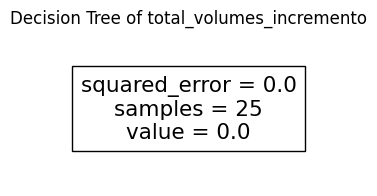

X: [[0.40233878 0.41289677 0.05590519 0.44836623 0.48943798 0.44897231
  0.49400924 0.44927247]
 [0.39610077 0.40648651 0.06795131 0.45163472 0.491537   0.45179284
  0.4956759  0.47105749]
 [0.40237232 0.41293167 0.08624179 0.51032242 0.53720666 0.51299224
  0.54105689 0.47600343]
 [0.39968733 0.41034987 0.03730297 0.46830348 0.50440777 0.47001861
  0.50908571 0.42275339]
 [0.40337467 0.41380888 0.03408747 0.49819872 0.52757747 0.4987764
  0.53031766 0.45896928]
 [0.38083063 0.39108932 0.11855303 0.37513628 0.43268171 0.3741509
  0.43872845 0.52841846]
 [0.40191155 0.41198223 0.12402881 0.57979943 0.59479429 0.58177215
  0.59537816 0.46585334]
 [0.38902656 0.39921593 0.08230488 0.42045093 0.4674105  0.42153431
  0.47331504 0.42846806]
 [0.39141986 0.4017976  0.05700538 0.49212787 0.52309767 0.49459973
  0.52747912 0.4414773 ]
 [0.39085245 0.4009735  0.05849309 0.47823792 0.51202016 0.47838631
  0.51516159 0.46269452]
 [0.3818004  0.3919187  0.05453298 0.43843289 0.48038274 0.43920323
 

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [490]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Filtrar los últimos 45 días
last_45_days = df_bit_normalized[-55:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Obtener la lista de columnas de interés para pronosticar
columns_to_forecast = ['prices', 'market_caps', 'total_volumes', 'prices_diff', 'prices_incremento', 'market_caps_diff', 'market_caps_incremento', 'total_volumes_diff', 'total_volumes_incremento']

# Crear un diccionario para almacenar los modelos y las predicciones
models = {}
predictions = {}
future_predictions = {col: [] for col in columns_to_forecast}  # Initialize the dictionary with empty lists

# Generar valores futuros de días para los próximos 30 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})
# Initialize future_days with the same columns as last_45_days
future_days = pd.concat([future_days] * len(columns_to_forecast), axis=1)
future_days.columns = columns_to_forecast

# Create an empty DataFrame to store the predictions for future days
future_predictions_df = pd.DataFrame({'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(), periods=30, freq='D')})

for column in columns_to_forecast:
    # Create a list of columns to forecast without the current column
    columns_to_forecast_without_current = [col for col in columns_to_forecast if col != column]

    # Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
    X = last_45_days[columns_to_forecast_without_current].values
    y = last_45_days[column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear el modelo Random Forest para cada columna
    model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=3)
    model.fit(X_train, y_train)

    # Extract an individual tree from the ensemble (for example, the first tree). [0]
    individual_tree = model.estimators_[5]

    # Plot the individual tree
    plt.figure(figsize=(3, 2))
    plot_tree(individual_tree, filled=True, feature_names=columns_to_forecast_without_current)
    plt.title(f'Decision Tree of {column}')
    plt.show()

    # Realizar predicciones para los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de rendimiento para cada modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'X: {X}')
    print(f'y: {y}')
    print(f'X_train: {X_train}')
    print(f'X_test: {X_test}')
    print(f'y_train: {y_train}')
    print(f'y_test: {y_test}')
    print(f"MSE for {column}: {mse}")
    print(f"R-squared for {column}: {r2}")

    # Guardar el modelo y las predicciones para cada columna en el diccionario
    models[column] = model
    predictions[column] = y_pred

    # Step 1: Predict values for future days using the trained models and add noise
    future_predictions[column] = model.predict(future_days[columns_to_forecast_without_current])

    # Calculate standard deviations for each variable
    std_desv = last_45_days[column].std() * 0.15

    # Generate Gaussian noise for each variable
    noises = np.random.normal(0, std_desv, len(future_predictions[column]))

    # Add noise to the predicted values
    future_predictions[column] += noises

    # Add the predictions to the future_predictions_df DataFrame
    future_predictions_df[column] = future_predictions[column]

# Step 2: Concatenate the historical and projected data with noise into a single DataFrame
projected_df = pd.concat([last_45_days, future_predictions_df])

# Step 3: Reset the indices
projected_df.reset_index(drop=True, inplace=True)

# Step 4: Merge the predictions DataFrame with the initial DataFrame
df_bit_normalized_with_predictions = pd.concat([df_bit_normalized, projected_df], ignore_index=True)

# Print the new DataFrame with predictions
print(df_bit_normalized_with_predictions)

        #________________________________________________________________________________________________________________

    # for column in columns_to_forecast_without_current:
    #     future_predictions[column] = models[column].predict(future_days[column])

    #     # Calcular desviaciones estándar para cada variable
    #     std_desv = last_45_days[column].std()*0.15

    #     # Generar ruido gaussiano para cada variable (este cálculo se mantiene)
    #     noises = {}
    #     noises[column] = np.random.normal(0, std_desv, len(future_predictions[column]))

    #     # Agregar ruido a los valores pronosticados (este paso se mantiene)

    #     future_predictions[column] += noises[column]

    # # Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
    # projected_df = pd.concat([last_45_days, projected_data_with_noise])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)

#_______________________________________________________________________________________________________________________




In [491]:
df_bit_normalized_with_predictions

timestamp    prices  market_caps  total_volumes  prices_diff  \
0    2013-04-28 00:00:00  0.000999     0.000571       0.000000     0.480900   
1    2013-04-29 00:00:00  0.001098     0.000629       0.000000     0.481362   
2    2013-04-30 00:00:00  0.000999     0.000571       0.000000     0.480437   
3    2013-05-01 00:00:00  0.000728     0.000413       0.000000     0.479629   
4    2013-05-02 00:00:00  0.000527     0.000295       0.000000     0.479957   
...                  ...       ...          ...            ...          ...   
3818 2023-08-19 18:54:32  0.444362     0.464613       0.115507     0.581714   
3819 2023-08-20 18:54:32  0.446710     0.463292       0.119979     0.580801   
3820 2023-08-21 18:54:32  0.441244     0.459345       0.116927     0.603141   
3821 2023-08-22 18:54:32  0.449250     0.468001       0.113085     0.586707   
3822 2023-08-23 18:54:32  0.451331     0.452800       0.131185     0.586185   

      prices_incremento  market_caps_diff  market_caps_incremento  \
0              0.514133          0.482309                0.518128   
1              0.586049          0.482587                0.590047   
2              0.445590          0.482036                0.450659   
3              0.316524          0.481554                0.322629   
4              0.344681          0.481750                0.350569   
...                 ...               ...                     ...   
3818           0.600144          0.589627                0.594872   
3819           0.591401          0.602957                0.602559   
3820           0.599102          0.597329                0.587469   
3821           0.596947          0.586111                0.605781   
3822           0.599275          0.595907                0.608355   

      total_volumes_diff  total_volumes_incremento  days  
0               0.461516                       0.0   NaN  
1               0.461516                       0.0   NaN  
2               0.461516                       0.0   NaN  
3               0.461516                       0.0   NaN  
4               0.461516                       0.0   NaN  
...                  ...                       ...   ...  
3818            0.482708                       0.0   NaN  
3819            0.476862                       0.0   NaN  
3820            0.475658                       0.0   NaN  
3821            0.481673                       0.0   NaN  
3822            0.477275                       0.0   NaN  

[3823 rows x 11 columns]

In [492]:
# sns.pairplot(df_bit_normalized_with_predictions)

In [493]:
projected_df = df_bit_normalized_with_predictions

In [494]:
models

{'prices': RandomForestRegressor(max_depth=3, random_state=42),
 'market_caps': RandomForestRegressor(max_depth=3, random_state=42),
 'total_volumes': RandomForestRegressor(max_depth=3, random_state=42),
 'prices_diff': RandomForestRegressor(max_depth=3, random_state=42),
 'prices_incremento': RandomForestRegressor(max_depth=3, random_state=42),
 'market_caps_diff': RandomForestRegressor(max_depth=3, random_state=42),
 'market_caps_incremento': RandomForestRegressor(max_depth=3, random_state=42),
 'total_volumes_diff': RandomForestRegressor(max_depth=3, random_state=42),
 'total_volumes_incremento': RandomForestRegressor(max_depth=3, random_state=42)}

In [495]:
predictions

{'prices': array([0.45018854, 0.3790871 , 0.45018854, 0.38267352, 0.39404048,
        0.4426111 , 0.45028406, 0.44771979, 0.45009438, 0.38251877,
        0.44257668, 0.40011015, 0.4500657 , 0.45028406, 0.38963488,
        0.38948878, 0.40324705]),
 'market_caps': array([0.46257403, 0.38901525, 0.46254686, 0.39254774, 0.40416782,
        0.45508275, 0.46257403, 0.46038964, 0.46205222, 0.3924869 ,
        0.45499321, 0.41030105, 0.46205222, 0.46257403, 0.39972303,
        0.39957676, 0.41456861]),
 'total_volumes': array([0.05686539, 0.10738254, 0.08915224, 0.05593106, 0.06423191,
        0.05619524, 0.06037804, 0.0849473 , 0.11575179, 0.0556559 ,
        0.06111462, 0.06281705, 0.10577216, 0.06357834, 0.0574155 ,
        0.0574155 , 0.07407365]),
 'prices_diff': array([0.48603998, 0.41539753, 0.47685328, 0.47622002, 0.50688451,
        0.48326861, 0.50203654, 0.47015068, 0.5348765 , 0.47699043,
        0.46904207, 0.47074796, 0.51759971, 0.46356795, 0.50087062,
        0.50087062, 0.573

## Data Normalization invert:

In [497]:

# Check for infinity or very large values in the DataFrame
if np.any(np.isinf(df_bit[cols_to_normalize])) or np.any(np.max(df_bit[cols_to_normalize]) > 1e30):
    # Handle problematic values (replace with a valid value or drop rows/columns)
    # For example, you can replace infinity with NaN:
    df_bit[cols_to_normalize] = df_bit[cols_to_normalize].replace([np.inf, -np.inf], np.nan)

# Reverting the normalization
scaler = MinMaxScaler()  # Create a new scaler object
scaler.fit(df_bit[cols_to_normalize])  # Fit the scaler on the original data

# Inverse transform the normalized data to get the real values
df_bit_original_scale = df_bit_normalized_with_predictions.copy()
df_bit_original_scale[cols_to_normalize] = scaler.inverse_transform(df_bit_normalized_with_predictions[cols_to_normalize])

print(df_bit_original_scale)

               timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3818 2023-08-19 18:54:32  30084.109554  5.945589e+11   2.066348e+10   
3819 2023-08-20 18:54:32  30242.709181  5.928709e+11   2.146348e+10   
3820 2023-08-21 18:54:32  29873.500901  5.878263e+11   2.091749e+10   
3821 2023-08-22 18:54:32  30414.316415  5.988893e+11   2.023017e+10   
3822 2023-08-23 18:54:32  30554.889247  5.794618e+11   2.346828e+10   

      prices_diff  prices_incremento  market_caps_diff  \
0        0.000000           0.000000     -1.490250e-05   
1        6.660000           4.9

In [498]:
projected_df = df_bit_original_scale

________________________________________________________

# 2.0 Regresión Lineal: codigo anterior.. 

In [ ]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression


In [ ]:
# # Opcion 2: - CONECTADA - OK
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import linear_model

# # Filtrar los últimos 45 días
# last_45_days = df_bit[-253:].copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
# last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = last_45_days[['days']].values
# y_prices = last_45_days[['prices']].values
# y_market_caps = last_45_days[['market_caps']].values
# y_total_volumes = last_45_days[['total_volumes']].values

# #___________________________________________________________________________________________________________
# # # Normalizar las características (X)
# # scaler = MinMaxScaler()
# # X = scaler.fit_transform(X)

# # Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
# X_train, X_test, y_prices_train, y_prices_test, y_market_caps_train, y_market_caps_test, y_total_volumes_train, y_total_volumes_test = train_test_split(X, y_prices, y_market_caps, y_total_volumes, test_size=0.3, random_state=42)

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de entrenamiento
# model_prices.fit(X_train, y_prices_train)
# model_market_caps.fit(X_train, y_market_caps_train)
# model_total_volumes.fit(X_train, y_total_volumes_train)

# # Realizar predicciones para los datos de prueba
# y_prices_pred = model_prices.predict(X_test)
# y_market_caps_pred = model_market_caps.predict(X_test)
# y_total_volumes_pred = model_total_volumes.predict(X_test)

# # Calcular métricas de rendimiento para cada modelo
# mse_prices = mean_squared_error(y_prices_test, y_prices_pred)
# mse_market_caps = mean_squared_error(y_market_caps_test, y_market_caps_pred)
# mse_total_volumes = mean_squared_error(y_total_volumes_test, y_total_volumes_pred)

# r2_prices = r2_score(y_prices_test, y_prices_pred)
# r2_market_caps = r2_score(y_market_caps_test, y_market_caps_pred)
# r2_total_volumes = r2_score(y_total_volumes_test, y_total_volumes_pred)

# print("MSE for prices:", mse_prices)
# print("MSE for market_caps:", mse_market_caps)
# print("MSE for total_volumes:", mse_total_volumes)

# print("R-squared for prices:", r2_prices)
# print("R-squared for market_caps:", r2_market_caps)
# print("R-squared for total_volumes:", r2_total_volumes)


# #___________________________________________________________________________________________________________

# # Generar valores futuros de días para los próximos 30 días
# future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
# future_prices = model_prices.predict(future_days)
# future_market_caps = model_market_caps.predict(future_days)
# future_total_volumes = model_total_volumes.predict(future_days)

# # Calcular desviaciones estándar para cada variable
# std_prices = 2229.815617/6
# std_market_caps = 4.379837e+10/6
# std_total_volumes = 3.940256e+09

# # Generar ruido gaussiano para cada variable
# noise_prices = np.random.normal(0, std_prices, len(future_prices))
# noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
# noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# # Agregar ruido a los valores pronosticados
# future_prices += noise_prices
# future_market_caps += noise_market_caps
# future_total_volumes += noise_total_volumes

# # Crear un DataFrame con los valores proyectados y con ruido
# projected_data_with_noise = pd.DataFrame({
#     'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(), periods=30, freq='D'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
# projected_df = pd.concat([last_45_days, projected_data_with_noise])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)


In [ ]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [58]], dtype=int64)

In [ ]:
projected_df.describe()

timestamp        prices   market_caps  \
count                             90     90.000000  9.000000e+01   
mean   2023-07-08 08:45:29.877778176  29021.291914  5.646494e+11   
min              2023-05-25 00:00:00  25107.754696  4.872628e+11   
25%              2023-06-16 06:00:00  27264.666958  5.287893e+11   
50%              2023-07-08 12:00:00  29850.775550  5.806809e+11   
75%              2023-07-30 08:35:19  30190.277061  5.883636e+11   
max              2023-08-21 14:35:19  31446.014971  6.107255e+11   
std                              NaN   1691.647288  3.375331e+10   

       total_volumes       days  
count   9.000000e+01  60.000000  
mean    1.061426e+10  29.483333  
min     4.210431e+09   0.000000  
25%     6.657241e+09  14.750000  
50%     9.409890e+09  29.500000  
75%     1.297269e+10  44.250000  
max     2.375725e+10  58.000000  
std     4.939649e+09  17.436074

In [ ]:
# Rellenamos los valores faltantes en la columna 'days' con una enumeración incremental
projected_df['days'] = range(len(projected_df))

# Mostramos el DataFrame actualizado
print(projected_df)


             timestamp        prices   market_caps  total_volumes  days
0  2023-05-25 00:00:00  26338.948947  5.109880e+11   1.747720e+10     0
1  2023-05-26 00:00:00  26475.607903  5.132957e+11   1.195375e+10     1
2  2023-05-27 00:00:00  26717.987554  5.179737e+11   1.099404e+10     2
3  2023-05-28 00:00:00  26848.239940  5.204620e+11   6.029472e+09     3
4  2023-05-29 00:00:00  28110.313468  5.448792e+11   1.314460e+10     4
..                 ...           ...           ...            ...   ...
85 2023-08-17 14:35:19  29849.772065  5.745410e+11   6.867439e+09    85
86 2023-08-18 14:35:19  30197.079196  5.754551e+11   7.166523e+09    86
87 2023-08-19 14:35:19  29542.091959  5.800714e+11   9.286358e+09    87
88 2023-08-20 14:35:19  29971.456164  5.840798e+11   7.642108e+09    88
89 2023-08-21 14:35:19  29601.384521  5.751897e+11   6.686547e+09    89

[90 rows x 5 columns]


In [ ]:
projected_df.tail(10)

timestamp        prices   market_caps  total_volumes  days
80 2023-08-12 14:35:19  30094.125511  5.891899e+11   8.513954e+09    80
81 2023-08-13 14:35:19  29876.052440  5.875378e+11   6.040004e+09    81
82 2023-08-14 14:35:19  29559.262084  5.749358e+11   8.124973e+09    82
83 2023-08-15 14:35:19  29851.779036  5.971598e+11   6.324740e+09    83
84 2023-08-16 14:35:19  29251.626108  5.748023e+11   5.266800e+09    84
85 2023-08-17 14:35:19  29849.772065  5.745410e+11   6.867439e+09    85
86 2023-08-18 14:35:19  30197.079196  5.754551e+11   7.166523e+09    86
87 2023-08-19 14:35:19  29542.091959  5.800714e+11   9.286358e+09    87
88 2023-08-20 14:35:19  29971.456164  5.840798e+11   7.642108e+09    88
89 2023-08-21 14:35:19  29601.384521  5.751897e+11   6.686547e+09    89

_____________________________________________

# Grafica:

In [ ]:
from sklearn import tree

In [388]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# import matplotlib.pyplot as plt

# # Plot the feature importances
# feature_importances = model_prices.feature_importances_
# feature_names = colls_to_normalize = ['prices', 'market_caps', 'total_volumes', 'prices_diff', 'prices_incremento', 'market_caps_diff', 'market_caps_incremento', 'total_volumes_diff', 'total_volumes_incremento']

# plt.figure(figsize=(4, 3))
# plt.bar(feature_names, feature_importances)
# plt.title('Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

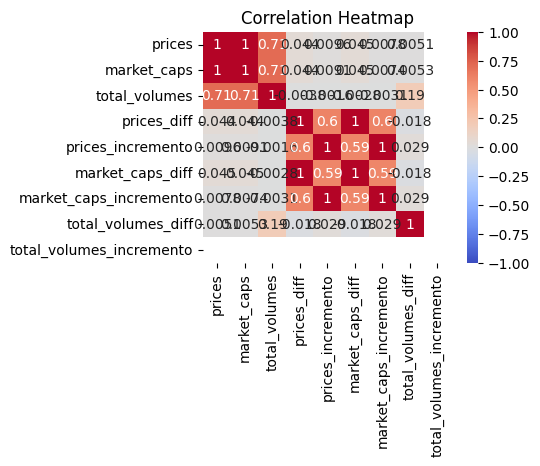

                            prices  market_caps  total_volumes  prices_diff  \
prices                    1.000000     0.999676       0.709989     0.043688   
market_caps               0.999676     1.000000       0.707495     0.043515   
total_volumes             0.709989     0.707495       1.000000    -0.003781   
prices_diff               0.043688     0.043515      -0.003781     1.000000   
prices_incremento         0.009555     0.009106      -0.001566     0.604560   
market_caps_diff          0.045479     0.045460      -0.002783     0.997361   
market_caps_incremento    0.007792     0.007393      -0.003109     0.602765   
total_volumes_diff        0.005100     0.005265       0.192762    -0.017697   
total_volumes_incremento       NaN          NaN            NaN          NaN   

                          prices_incremento  market_caps_diff  \
prices                             0.009555          0.045479   
market_caps                        0.009106          0.045460   
total_volumes 

In [499]:
# Obtener el subconjunto de datos que contiene las columnas de interés
subset_df = projected_df[['prices', 'market_caps', 'total_volumes', 'prices_diff', 'prices_incremento', 'market_caps_diff', 'market_caps_incremento', 'total_volumes_diff', 'total_volumes_incremento']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

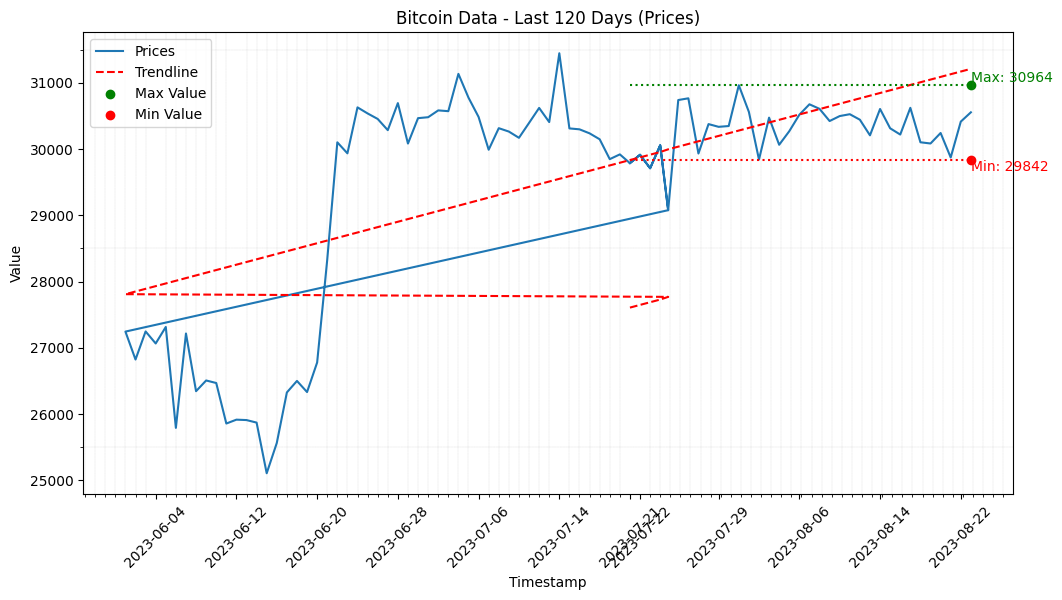

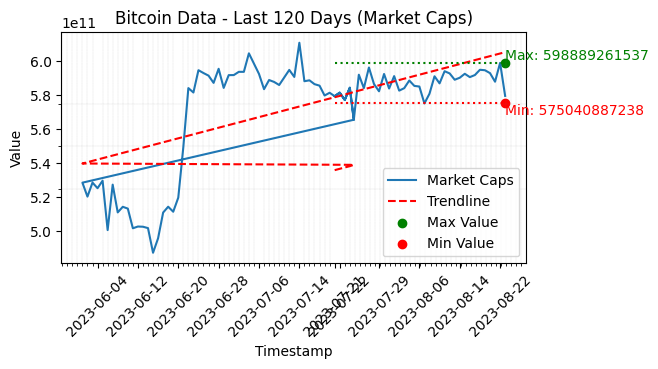

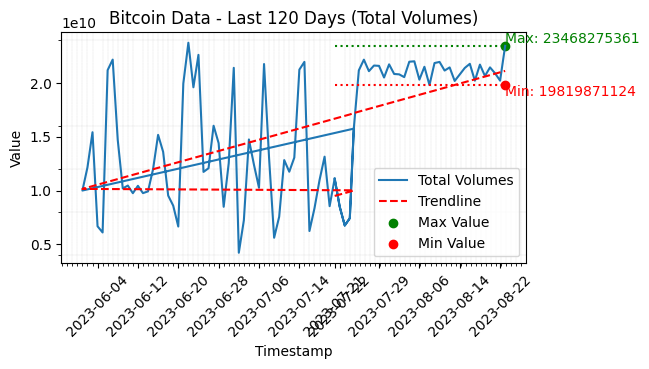

In [500]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(90)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(6, 3))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(6, 3))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


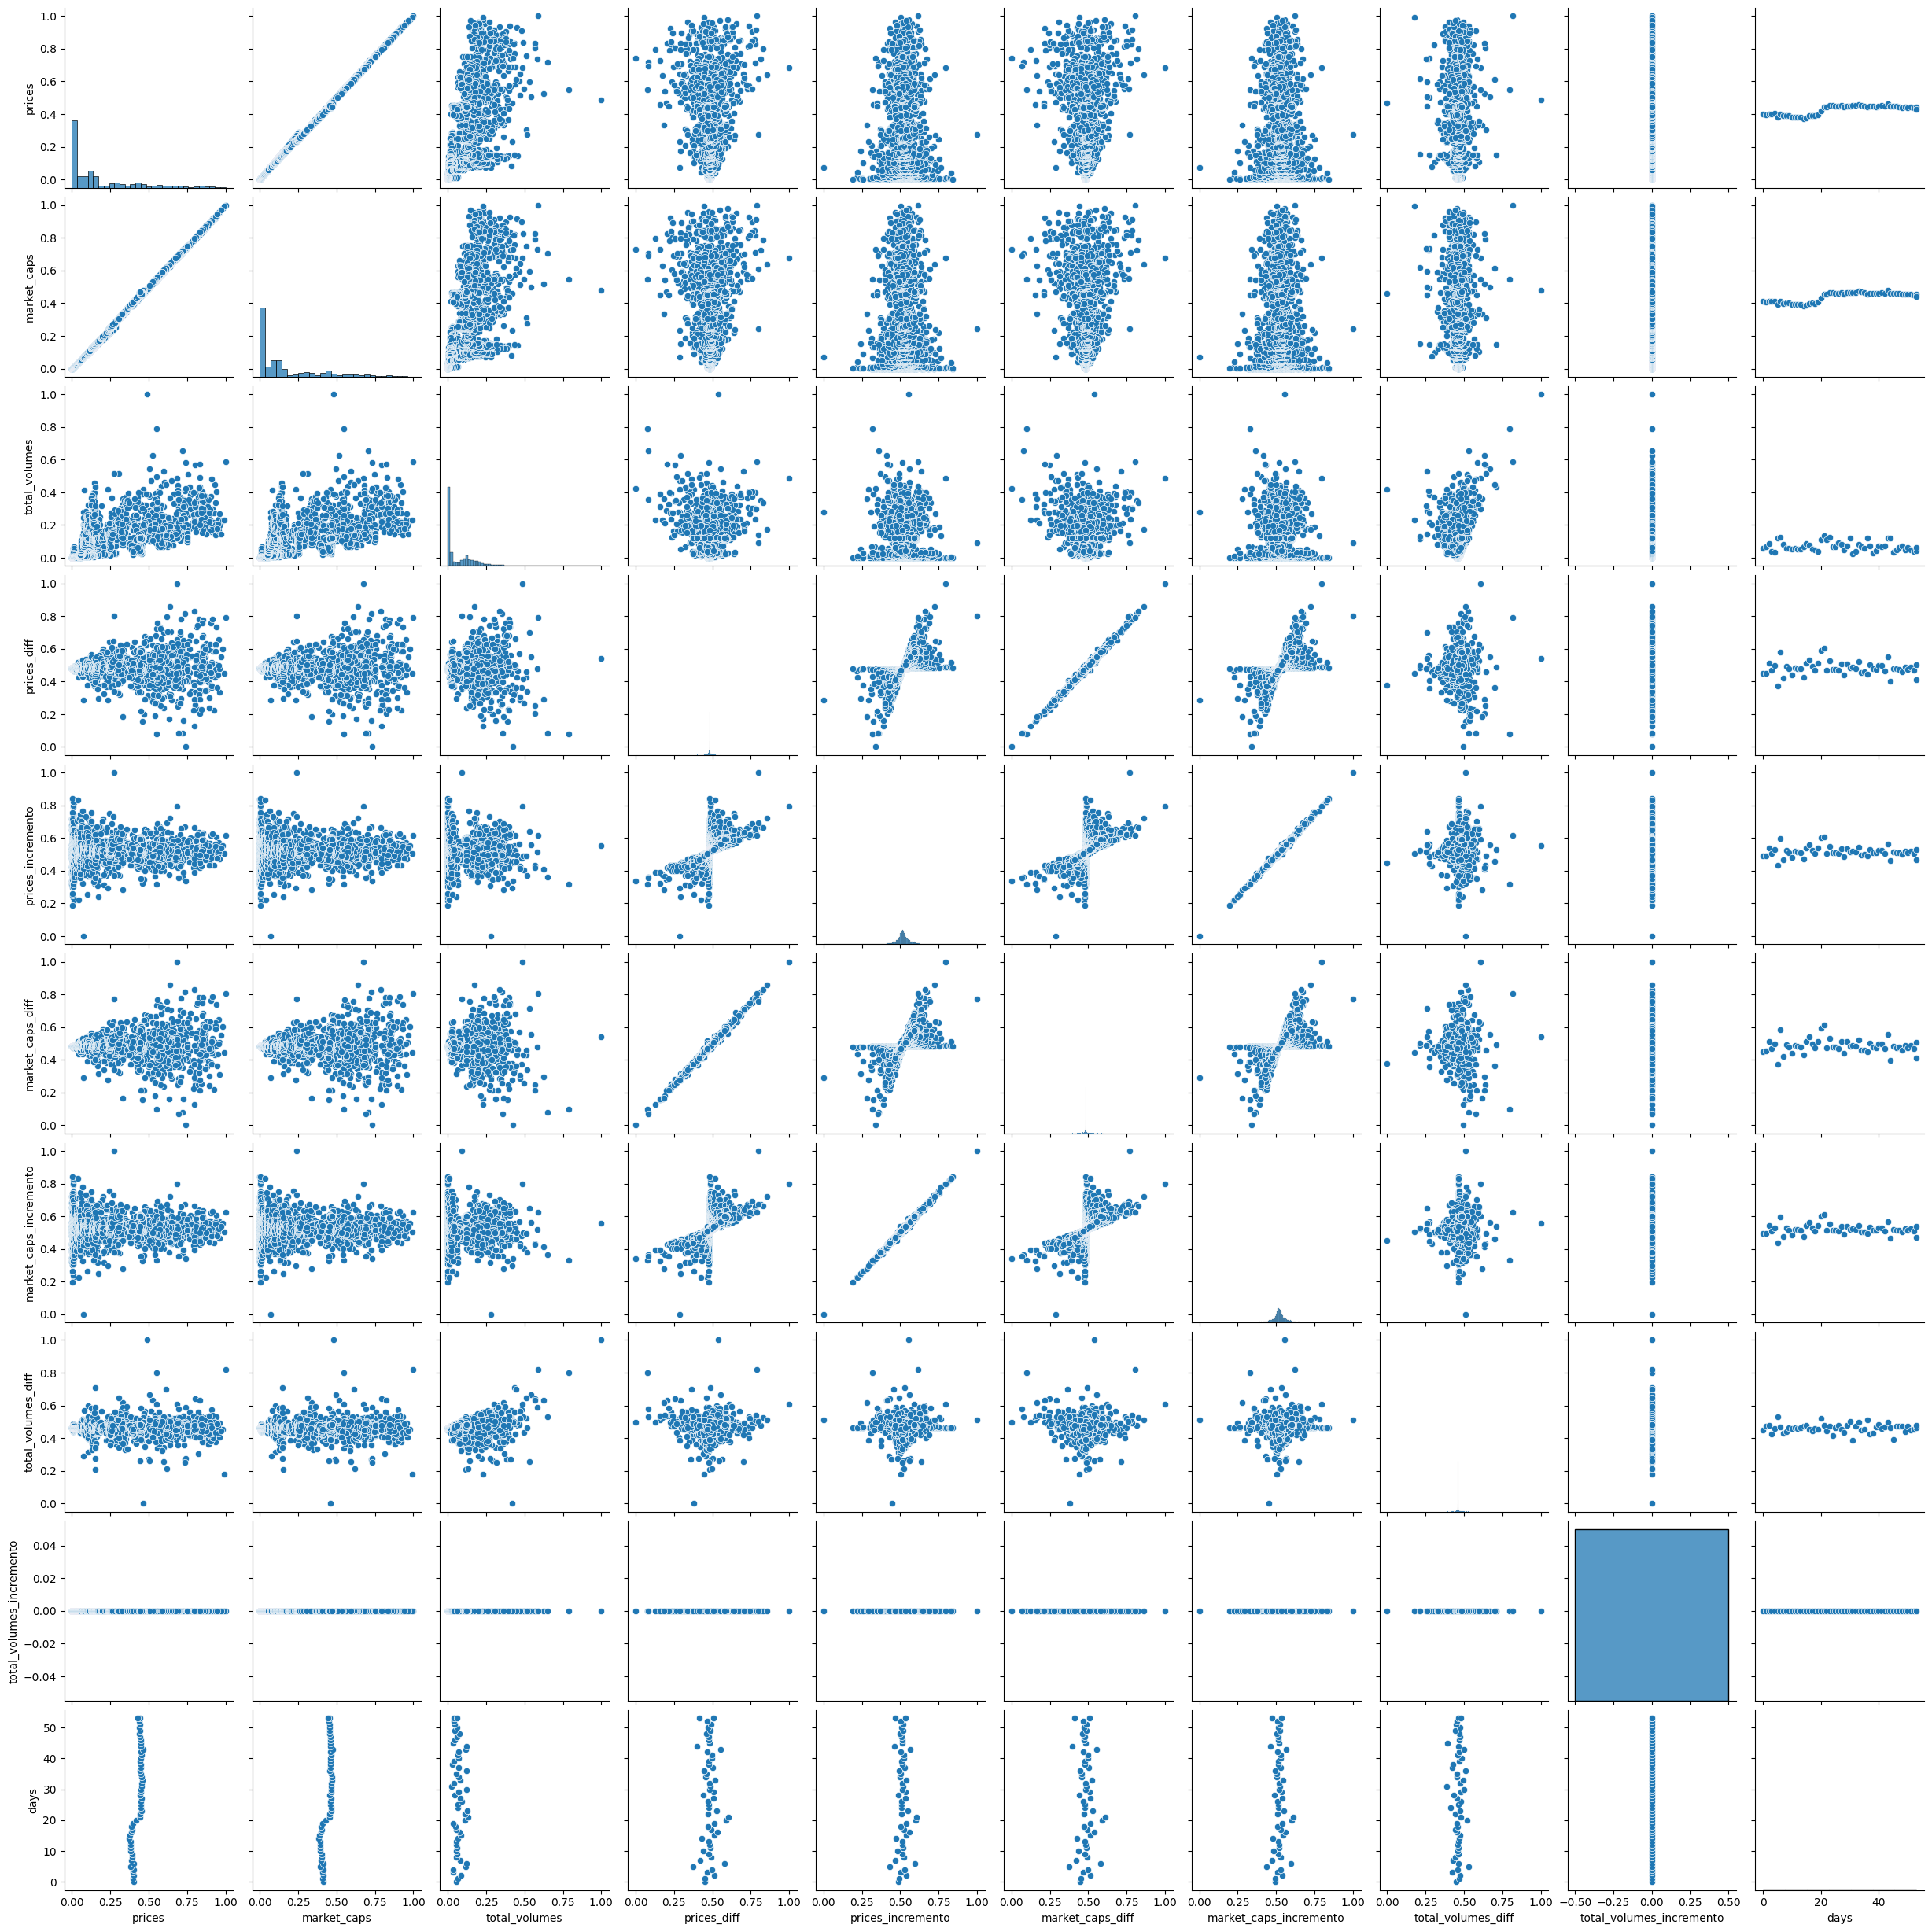

In [331]:
sns.pairplot(projected_df)


### tampoco funicono muy bien pero sirvio para entender Árboles de decisión


### Debo conectar y agrandar el dataset estudiado, por ser bitcoin dependiente de multiples variables, que aqui no pueden sensarse,sigue en mejora continua

#### Fundamental agregar un punto que represente hoy en el grafo de abajo

_____________________________________________

# 2. Regresión lineal múltiple


In [ ]:
import numpy as np

In [446]:
X = df_bit[['timestamp','market_caps','total_volumes']]
y = df_bit['prices']

In [447]:
X.tail(3)


timestamp   market_caps  total_volumes
3736 2023-07-23 00:00:00  5.770685e+11   6.745541e+09
3737 2023-07-24 00:00:00  5.842968e+11   7.427607e+09
3738 2023-07-24 18:54:32  5.654524e+11   1.576299e+10

In [448]:
y.tail(3)

3736    29710.155936
3737    30057.956719
3738    29077.816388
Name: prices, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2614, 3) (2614,) (1121, 3) (1121,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# Assuming X and y are defined correctly as pandas DataFrames or numpy arrays

# Exclude the 'Timestamp' column from X_train
X_train = X_train.drop('timestamp', axis=1)  # Assuming X_train is a DataFrame
# X_train = X_train[:, 1:]  # Assuming X_train is a numpy array

# Convert X_train and y_train to numpy arrays and ensure they have a numeric data type
X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

# Check the shapes and data types of X_train and y_train
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

# Instantiate the linear regression model and train it
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get the coefficients and intercept
print('The coefficients of the linear regression model are:', linear_model.coef_)
print('The intercept of the linear regression model is:', linear_model.intercept_)


(2614, 2) float64
(2614,) float64
The coefficients of the linear regression model are: [5.26144983e-08 2.99146755e-09]
The intercept of the linear regression model is: 230.25268926395438


In [ ]:
X_train

array([[5.77136871e+09, 8.14090888e+08],
       [3.70204708e+11, 1.59435146e+10],
       [3.08042969e+09, 9.91664692e+07],
       ...,
       [1.29185013e+11, 1.53123005e+09],
       [7.23434797e+11, 5.38025590e+10],
       [4.49775317e+10, 5.32874223e+08]])

In [ ]:
# Assuming you have a DataFrame or numpy array for the new data called 'X_test'
# If using a DataFrame:
X_test = X_test.drop('timestamp', axis=1)  # Drop the 'timestamp' column, assuming it exists in the test data

# Convert X_test to a numpy array and ensure it has a numeric data type
X_test = np.array(X_test, dtype=np.float64)

# Make predictions on the new data using the trained linear regression model
predictions = linear_model.predict(X_test)

# 'predictions' will contain the predicted values for the new data

# If you have the true target values for the test data (ground truth), you can also evaluate the model's performance:
# Assuming 'y_test' contains the true target values (ground truth) for the test data
y_test = np.array(y_test, dtype=np.float64)  # Convert y_test to a numpy array with numeric data type

# Calculate the mean squared error (MSE) to evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# You can also calculate other evaluation metrics like R-squared, MAE, etc. if needed


Mean Squared Error: 139104.40896380003


In [ ]:
#Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [5.26144983e-08 2.99146755e-09]
La ordenada al origen del modelo de regresión lineal es: 230.25268926395438


In [ ]:
y_test

array([  655.89043017, 33677.56623592, 47414.18625501, ...,
        4279.47559255, 49091.81488233, 29787.04153036])

In [ ]:
predictions

array([  776.64262057, 33457.36587287, 46748.9786712 , ...,
        4157.71201709, 48351.2389619 , 30743.54745464])

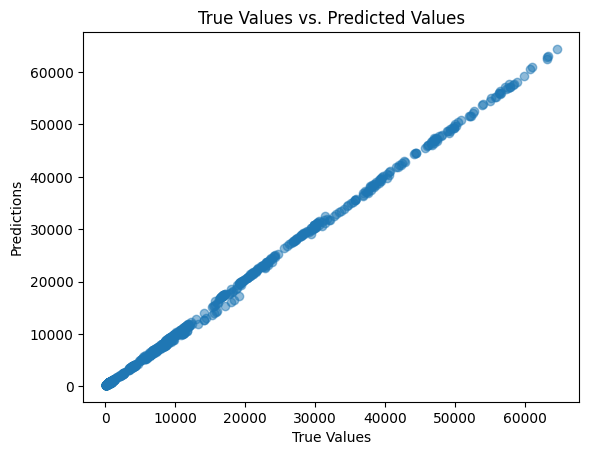

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the true target values for the test data (ground truth) in 'y_test'
# Assuming 'predictions' contains the predicted values for the new data

# Create a scatter plot to compare the true values with the predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')
plt.show()


Raíz del error cuadrático medio en Train: 0.0
Raíz del error cuadrático medio en Test: 0.0


C:\Users\Luca\AppData\Local\Temp\ipykernel_14420\950446082.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train, bins = 20, label = 'train', color = 'r', kde = True)
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Luca\AppData\Local\Temp\ipykernel_14420\950446082.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

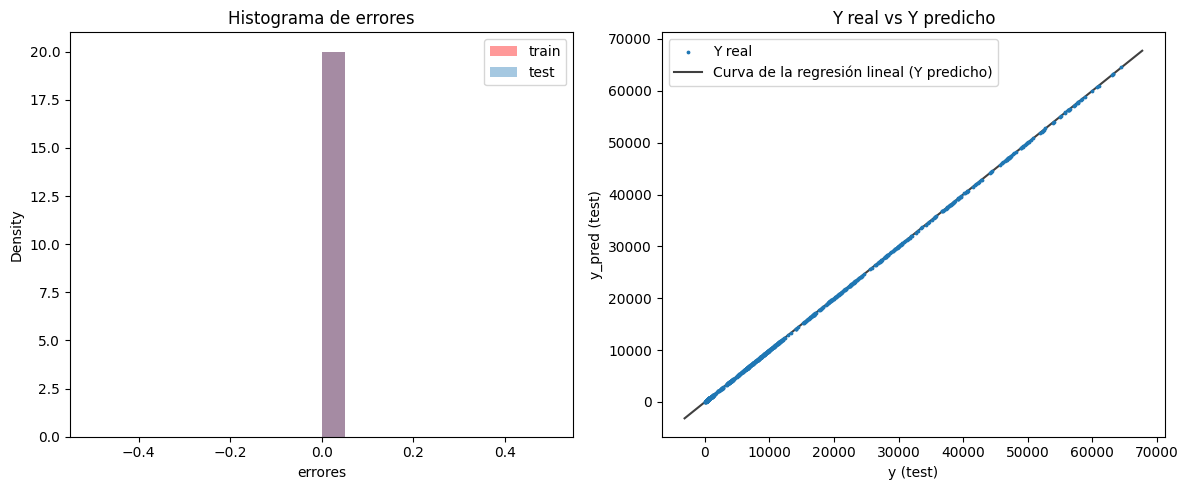

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train, squared = False))
rmse_test = (mean_squared_error(y_test, y_test, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

_____________________________________________

# Linear regresion con transpuesta.

In [ ]:
df_bit.tail(100)

timestamp        prices   market_caps  total_volumes
3634 2023-04-12 00:00:00  30260.936109  5.853593e+11   1.832030e+10
3635 2023-04-13 00:00:00  29904.138695  5.788506e+11   1.840770e+10
3636 2023-04-14 00:00:00  30405.027313  5.879390e+11   1.640403e+10
3637 2023-04-15 00:00:00  30468.408701  5.890514e+11   2.098407e+10
3638 2023-04-16 00:00:00  30312.161880  5.869698e+11   1.102826e+10
...                  ...           ...           ...            ...
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09

[100 rows x 4 columns]

____________________________________________________________________

# Intento linear Regresion con transpuesta:

## ok, wait, if we add some dimensions..?

In [ ]:
# Paso 1: Seleccionar solo las columnas numéricas
numeric_columns = df_bit.select_dtypes(include='number')

# Paso 2 y 3: Calcular la diferencia y agregar las columnas adicionales
for column in numeric_columns:
    diff_column_name = column + '_diff'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].diff()
    diff_column_name = column + '_incremento'  # Nombre de la columna adicional
    df_bit[diff_column_name] = df_bit[column].pct_change() * 100

In [ ]:
df_bit

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10   
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09   

      prices_diff  prices_incremento  market_caps_diff  \
0             NaN                NaN               NaN   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -299.827807          -0.994524     -5.792107e+09   
3733    46.449308           0.155619      9.274836e+08   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                        NaN                 NaN                       NaN  
1                   4.965914        0.000000e+00                       NaN  
2                  -4.658604        0.000000e+00                       NaN  
3                 -13.498813        0.000000e+00                       NaN  
4                 -11.569625        0.000000e+00                       NaN  
...                      ...                 ...                       ...  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.989257        2.178375e+09                 19.849636  
3733                0.159991       -3.637704e+09                -27.657343  

[3733 rows x 10 columns]

In [ ]:
df_bit.fillna(0)

timestamp        prices   market_caps  total_volumes  \
0    2013-04-28 00:00:00    135.300000  1.500518e+09   0.000000e+00   
1    2013-04-29 00:00:00    141.960000  1.575032e+09   0.000000e+00   
2    2013-04-30 00:00:00    135.300000  1.501657e+09   0.000000e+00   
3    2013-05-01 00:00:00    117.000000  1.298952e+09   0.000000e+00   
4    2013-05-02 00:00:00    103.430000  1.148668e+09   0.000000e+00   
...                  ...           ...           ...            ...   
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10   
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09   

      prices_diff  prices_incremento  market_caps_diff  \
0        0.000000           0.000000      0.000000e+00   
1        6.660000           4.922395      7.451441e+07   
2       -6.660000          -4.691462     -7.337451e+07   
3      -18.300000         -13.525499     -2.027059e+08   
4      -13.570000         -11.598291     -1.502838e+08   
...           ...                ...               ...   
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -299.827807          -0.994524     -5.792107e+09   
3733    46.449308           0.155619      9.274836e+08   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
0                   0.000000        0.000000e+00                  0.000000  
1                   4.965914        0.000000e+00                  0.000000  
2                  -4.658604        0.000000e+00                  0.000000  
3                 -13.498813        0.000000e+00                  0.000000  
4                 -11.569625        0.000000e+00                  0.000000  
...                      ...                 ...                       ...  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.989257        2.178375e+09                 19.849636  
3733                0.159991       -3.637704e+09                -27.657343  

[3733 rows x 10 columns]

In [ ]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3733
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3733 non-null   datetime64[ns]
 1   prices                    3733 non-null   float64       
 2   market_caps               3733 non-null   float64       
 3   total_volumes             3733 non-null   float64       
 4   prices_diff               3732 non-null   float64       
 5   prices_incremento         3732 non-null   float64       
 6   market_caps_diff          3732 non-null   float64       
 7   market_caps_incremento    3732 non-null   float64       
 8   total_volumes_diff        3732 non-null   float64       
 9   total_volumes_incremento  3491 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 449.8 KB


In [ ]:
# sns.pairplot(projected_df)

#### Las nuevas dimensiones creadas son viables y aportan informacion al ML ya que se pueden observar nuevas distribuciones normales agregadas y nuevas tendencias

In [ ]:
df_bit.isnull().sum()

timestamp                     0
prices                        0
market_caps                   0
total_volumes                 0
prices_diff                   1
prices_incremento             1
market_caps_diff              1
market_caps_incremento        1
total_volumes_diff            1
total_volumes_incremento    242
dtype: int64

In [ ]:
df_bit = df_bit.fillna(0)

In [ ]:
import missingno as msno

In [ ]:
df_bit = df_bit.drop_duplicates()

In [ ]:
df_bit.isnull().sum()

timestamp                   0
prices                      0
market_caps                 0
total_volumes               0
prices_diff                 0
prices_incremento           0
market_caps_diff            0
market_caps_incremento      0
total_volumes_diff          0
total_volumes_incremento    0
dtype: int64

In [ ]:
df_bit.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 3733
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 3733 non-null   datetime64[ns]
 1   prices                    3733 non-null   float64       
 2   market_caps               3733 non-null   float64       
 3   total_volumes             3733 non-null   float64       
 4   prices_diff               3733 non-null   float64       
 5   prices_incremento         3733 non-null   float64       
 6   market_caps_diff          3733 non-null   float64       
 7   market_caps_incremento    3733 non-null   float64       
 8   total_volumes_diff        3733 non-null   float64       
 9   total_volumes_incremento  3733 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 449.8 KB


#### Los datos eliminados corresponden a datos muy vejos, como el msno muestra. no hay problema con dropearlos..

<Axes: >

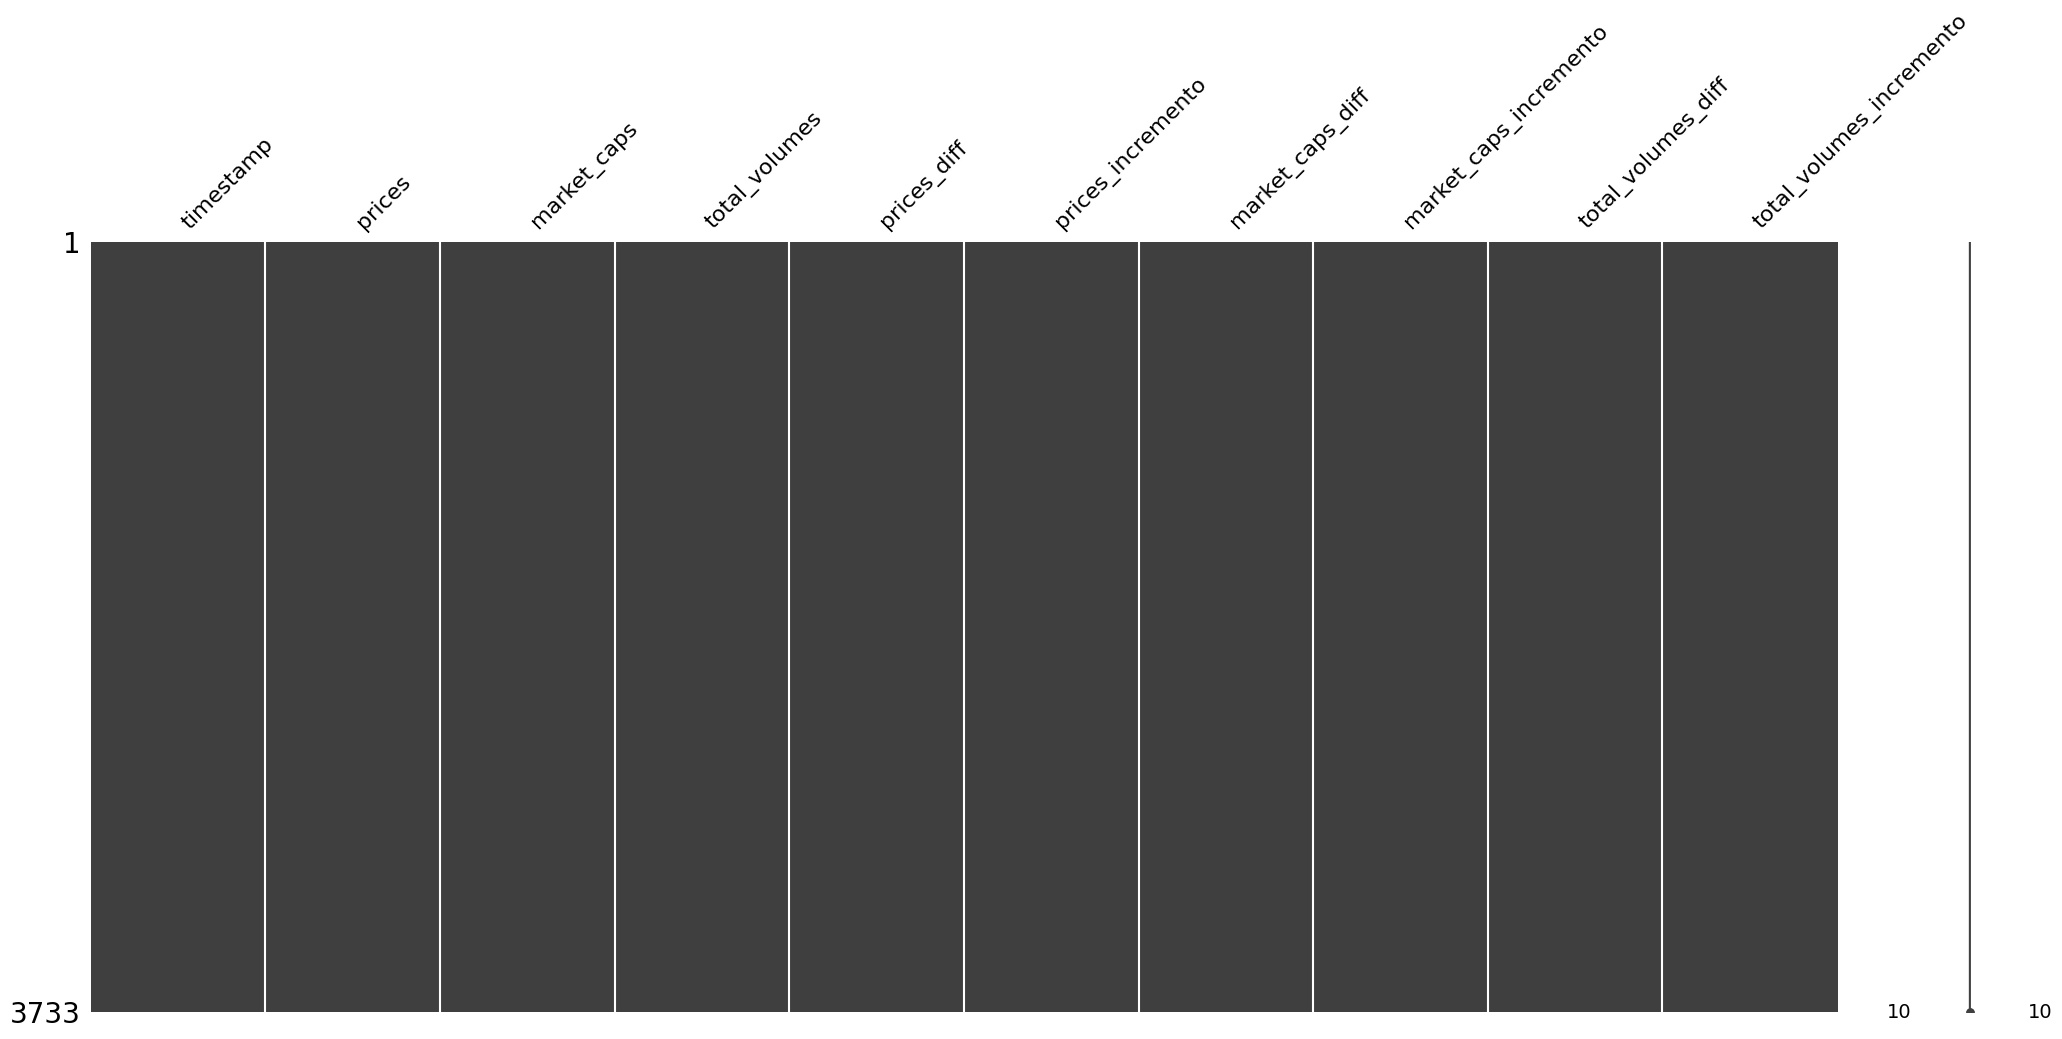

In [ ]:
# Visualizar los valores nulos utilizando missingno
msno.matrix(df_bit)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


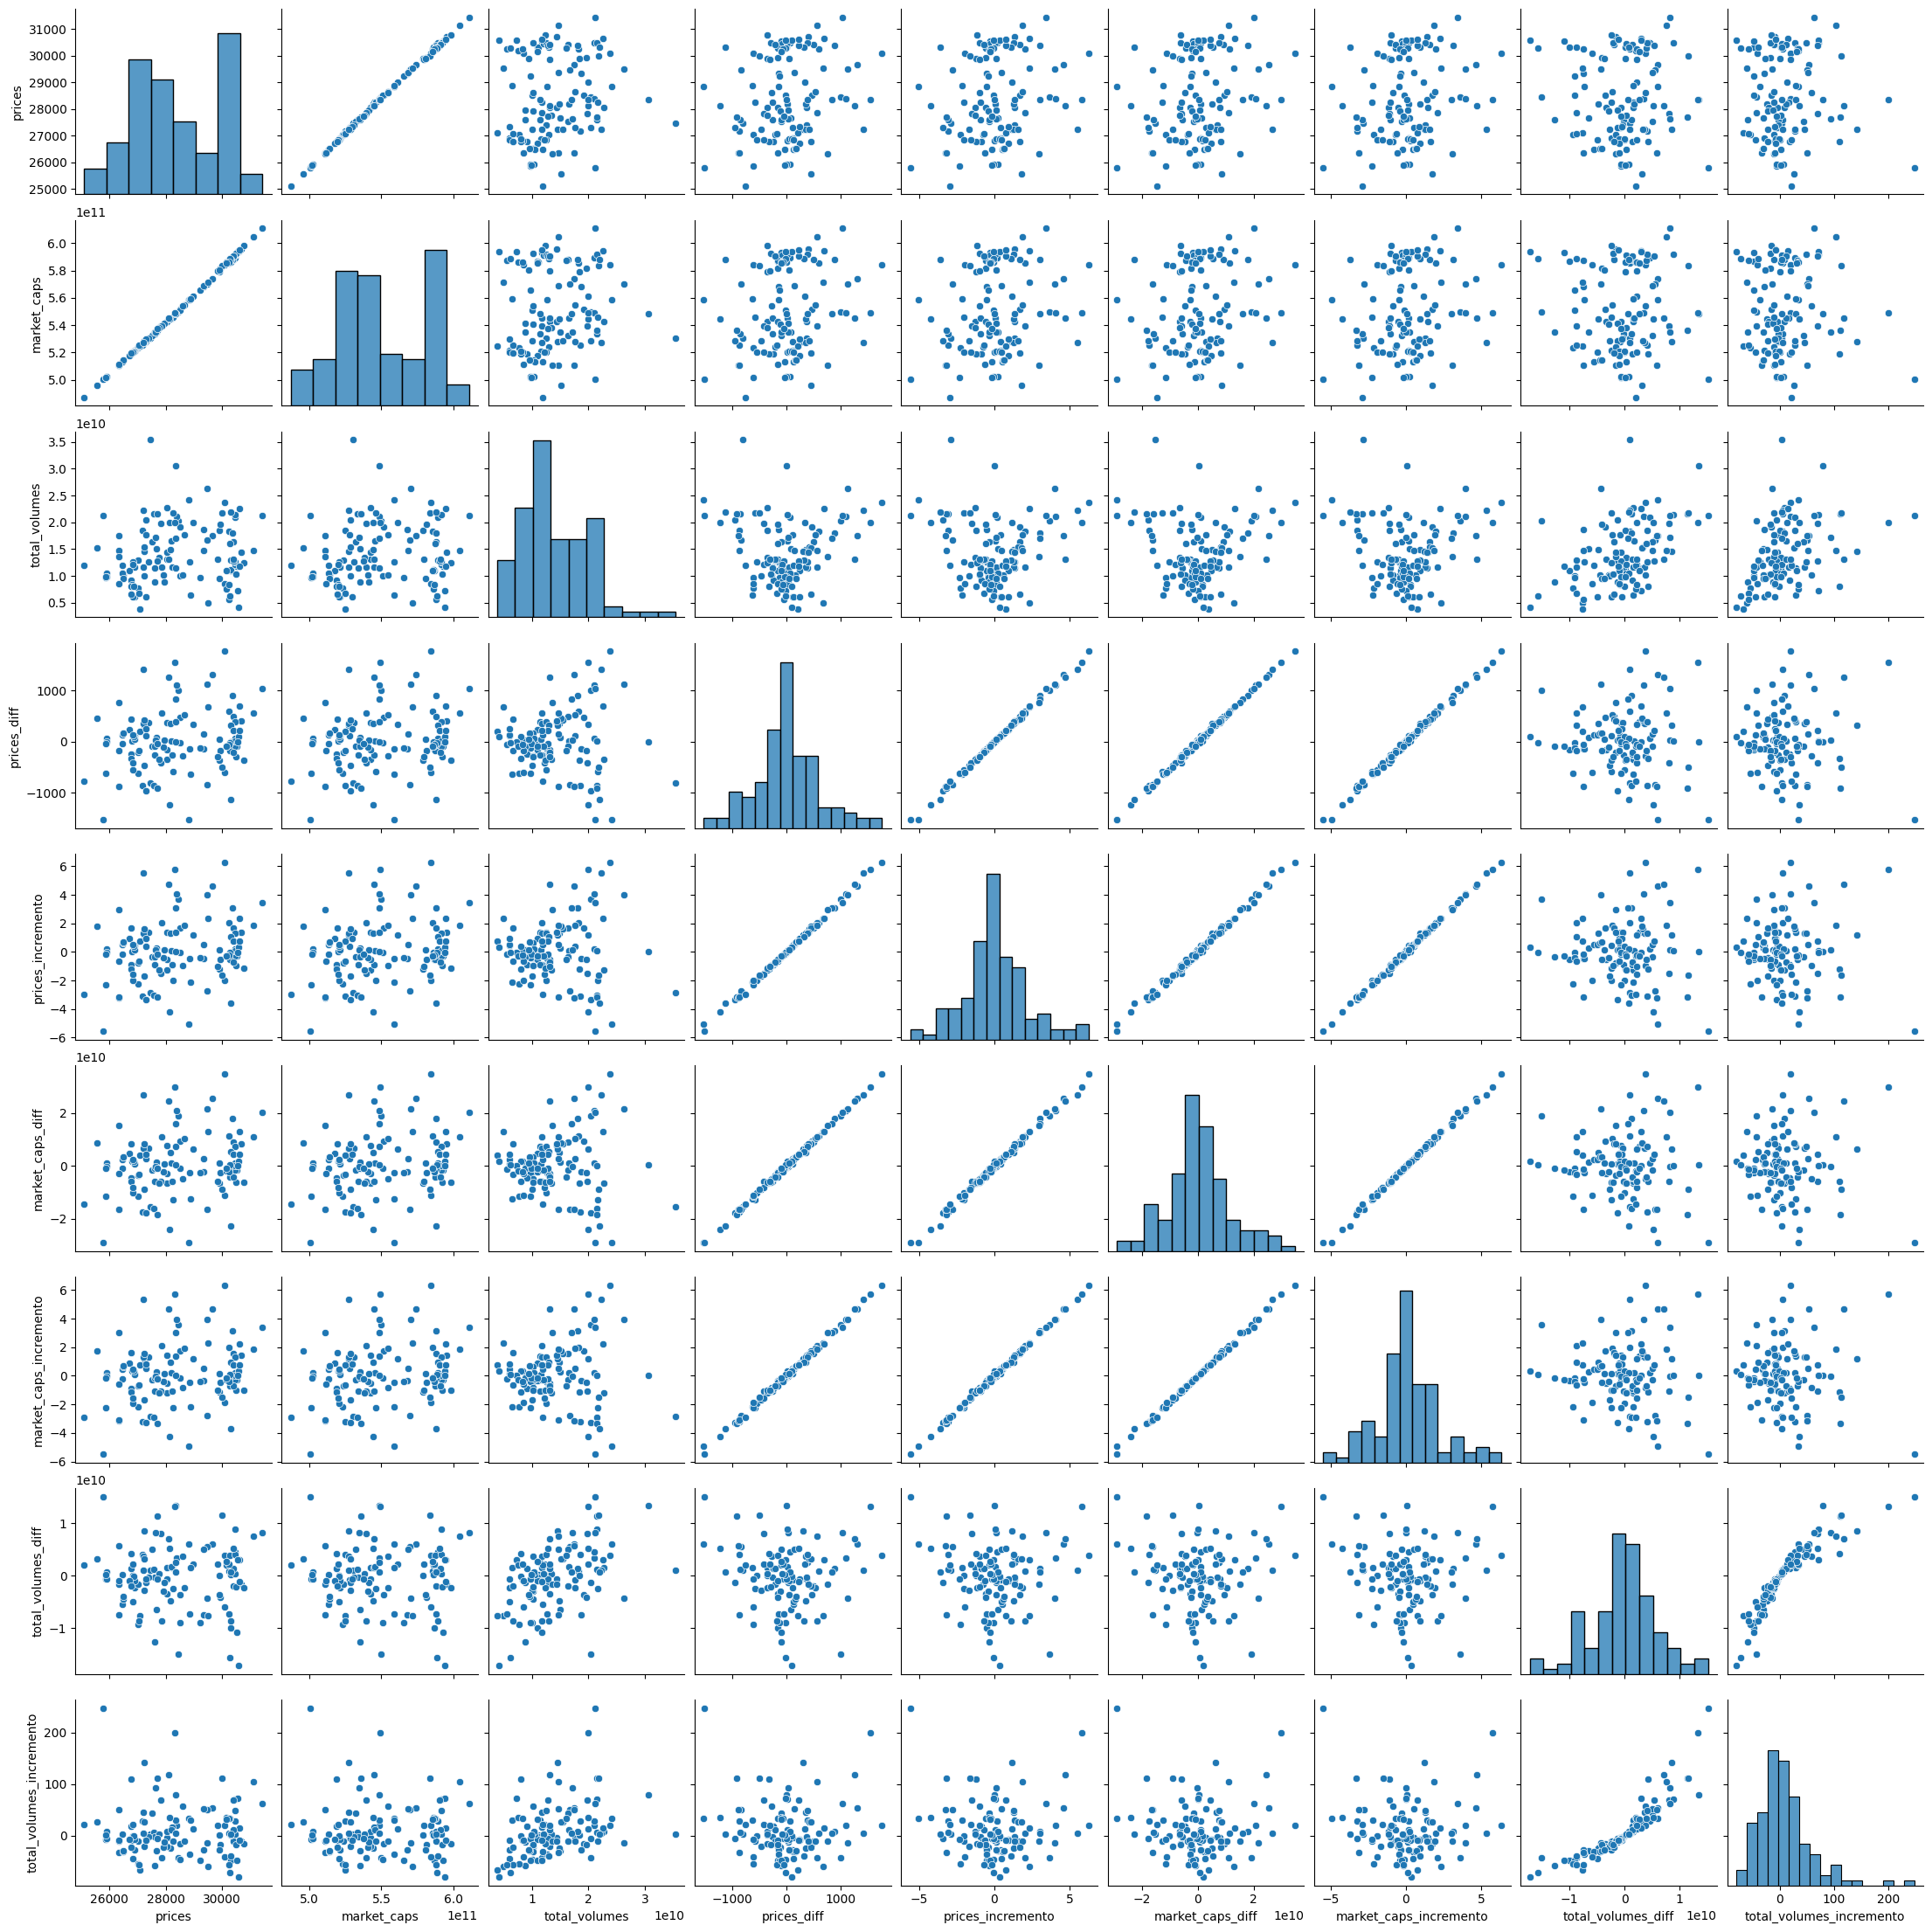

In [ ]:
sns.pairplot(df_bit.iloc[-120:,:])

In [ ]:
df_bit.describe()

timestamp        prices   market_caps  \
count                           3733   3733.000000  3.733000e+03   
mean   2018-06-09 10:27:02.817395456  11889.958074  2.208372e+11   
min              2013-04-28 00:00:00     67.809000  7.713681e+08   
25%              2015-11-19 00:00:00    567.381062  7.304054e+09   
50%              2018-06-10 00:00:00   6328.554760  1.091672e+11   
75%              2020-12-29 00:00:00  17106.505149  3.253115e+11   
max              2023-07-19 13:26:13  67617.015545  1.278798e+12   
std                              NaN  15584.897614  2.953450e+11   

       total_volumes  prices_diff  prices_incremento  market_caps_diff  \
count   3.733000e+03  3733.000000        3733.000000      3.733000e+03   
mean    1.413437e+10     7.971921           0.225126      1.551395e+08   
min     0.000000e+00 -6924.210173         -35.190269     -1.294806e+11   
25%     1.305731e+08   -44.536235          -1.335277     -7.154431e+08   
50%     3.554701e+09     1.146300           0.157887      1.779014e+07   
75%     2.428211e+10    66.797500           1.828557      1.173037e+09   
max     1.788941e+11  7474.233857          33.255625      1.389789e+11   
std     1.843966e+10   733.209627           4.002899      1.365434e+10   

       market_caps_incremento  total_volumes_diff  total_volumes_incremento  
count             3733.000000        3.733000e+03               3733.000000  
mean                 0.240085        2.548903e+06                       inf  
min                -35.775702       -1.042369e+11                -99.592742  
25%                 -1.282662       -5.746703e+08                -15.406360  
50%                  0.184812        0.000000e+00                  0.000000  
75%                  1.828768        4.854660e+08                 16.265830  
max                 33.272357        1.216206e+11                       inf  
std                  4.000286        7.028627e+09                       NaN

In [ ]:
df_bit.tail()

timestamp        prices   market_caps  total_volumes  \
3729 2023-07-16 00:00:00  30297.971400  5.886421e+11   6.233917e+09   
3730 2023-07-17 00:00:00  30237.334785  5.863914e+11   8.356410e+09   
3731 2023-07-18 00:00:00  30147.860079  5.855007e+11   1.097438e+10   
3732 2023-07-19 00:00:00  29848.032273  5.797086e+11   1.315276e+10   
3733 2023-07-19 13:26:13  29894.481580  5.806361e+11   9.515055e+09   

      prices_diff  prices_incremento  market_caps_diff  \
3729   -13.856408          -0.045713      5.346873e+08   
3730   -60.636615          -0.200134     -2.250700e+09   
3731   -89.474706          -0.295908     -8.907138e+08   
3732  -299.827807          -0.994524     -5.792107e+09   
3733    46.449308           0.155619      9.274836e+08   

      market_caps_incremento  total_volumes_diff  total_volumes_incremento  
3729                0.090917       -1.574323e+10                -71.634554  
3730               -0.382355        2.122494e+09                 34.047511  
3731               -0.151897        2.617973e+09                 31.328917  
3732               -0.989257        2.178375e+09                 19.849636  
3733                0.159991       -3.637704e+09                -27.657343

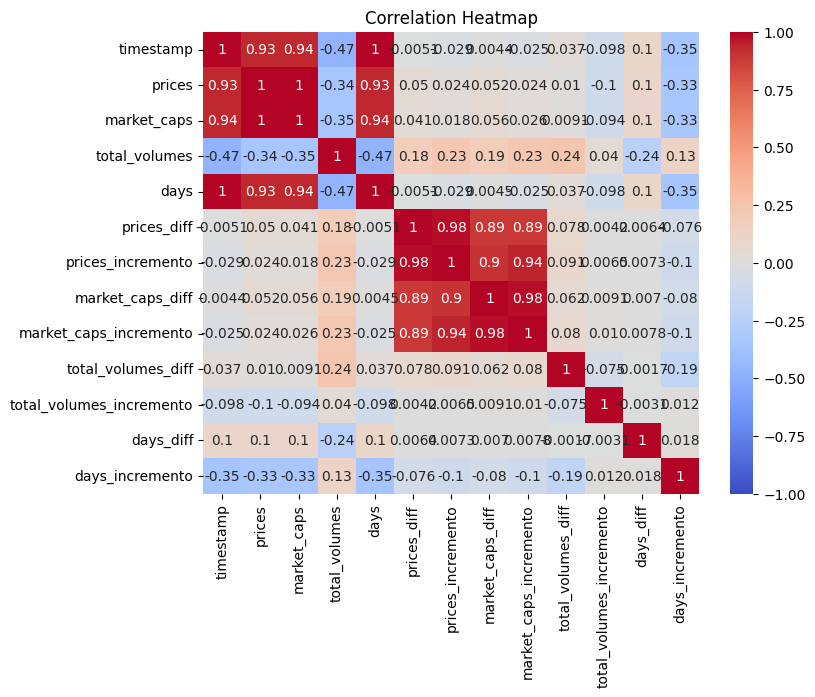

                          timestamp    prices  market_caps  total_volumes  \
timestamp                  1.000000  0.934455     0.936817      -0.469338   
prices                     0.934455  1.000000     0.999323      -0.344458   
market_caps                0.936817  0.999323     1.000000      -0.347628   
total_volumes             -0.469338 -0.344458    -0.347628       1.000000   
days                       0.999999  0.934468     0.936826      -0.469331   
prices_diff               -0.005149  0.049724     0.041236       0.183296   
prices_incremento         -0.029315  0.024380     0.017556       0.227035   
market_caps_diff           0.004409  0.052368     0.056153       0.185829   
market_caps_incremento    -0.024669  0.023670     0.026006       0.229371   
total_volumes_diff         0.036876  0.010375     0.009100       0.241590   
total_volumes_incremento  -0.097664 -0.101112    -0.093998       0.040450   
days_diff                  0.102837  0.101093     0.101180      -0.240886   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = projected_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

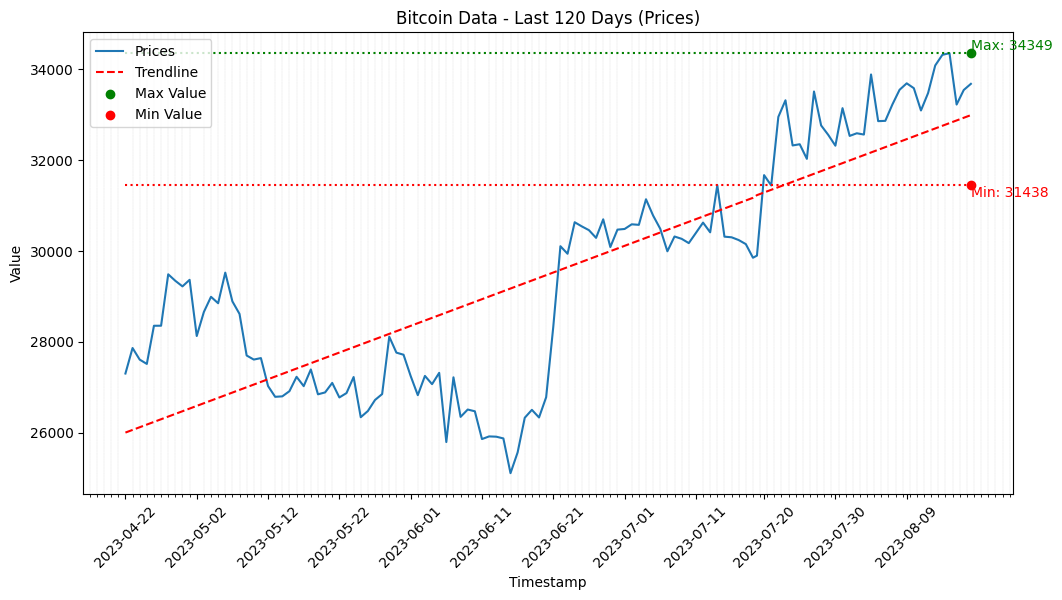

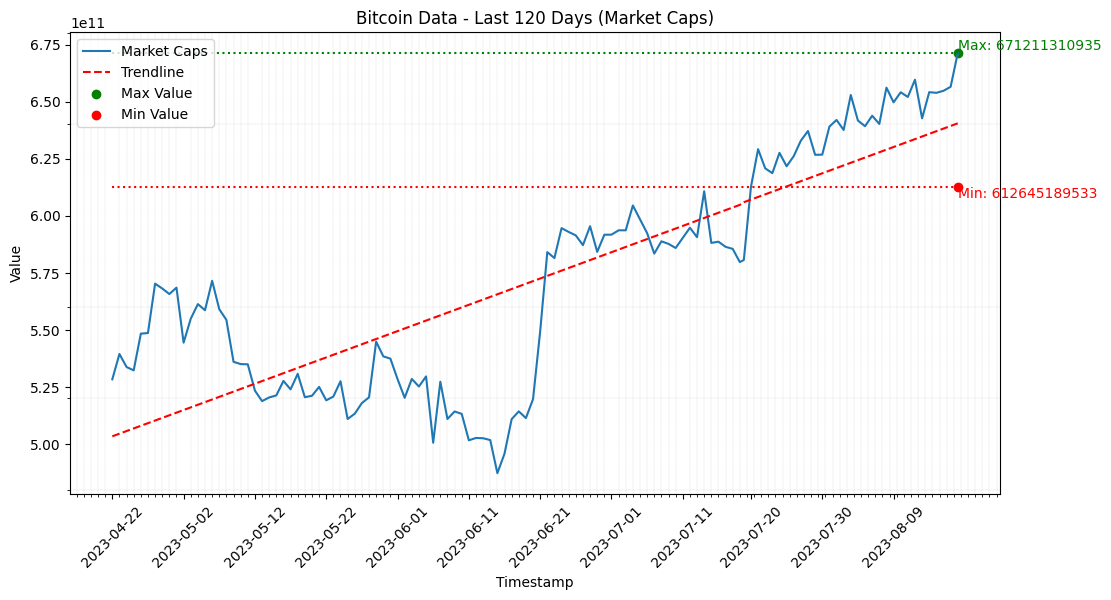

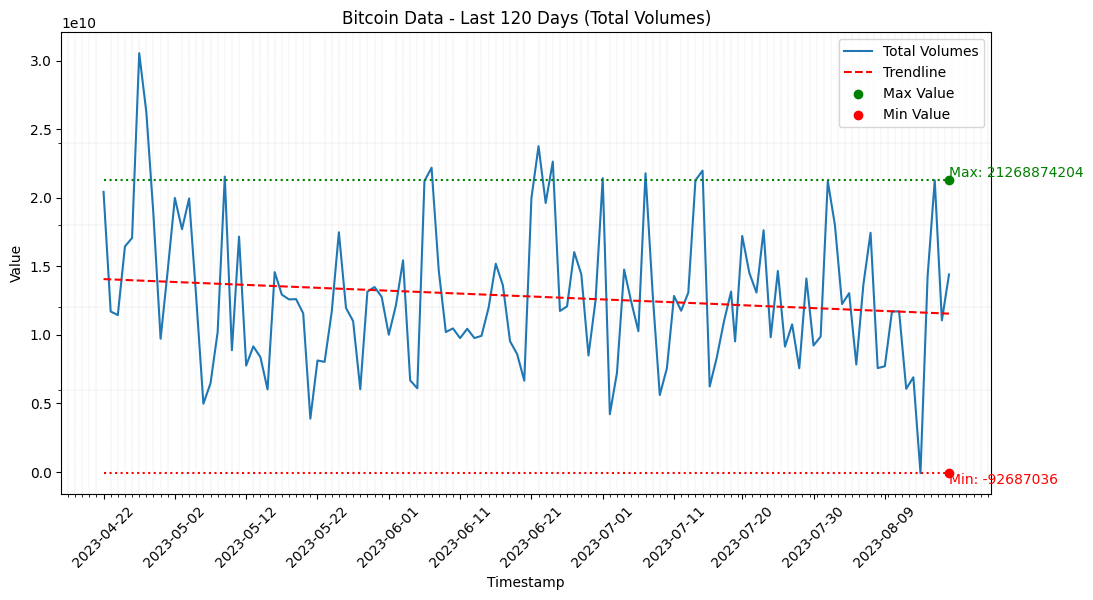

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')
# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)
# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()
# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')
# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# Activar la leyenda del gráfico de precios
ax.legend()
# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()
# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))
# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')
# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# # Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')
# # Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)
# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()
# # Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')
# # Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')
# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# # Activar la leyenda del gráfico de market_caps
ax.legend()
# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
# Mostrar el gráfico de market_caps
plt.show()
# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))
# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')
# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')
# # Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()
# # Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')
# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')
# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')
# # Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
# # Activar la leyenda del gráfico de total_volumes
ax.legend()
# # Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
# # Mostrar el gráfico de total_volumes
plt.show()


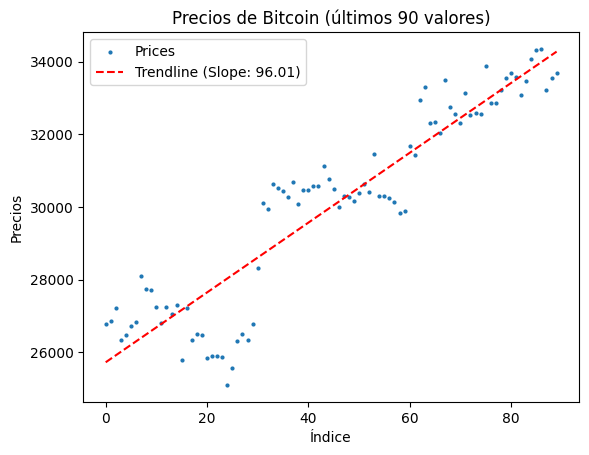

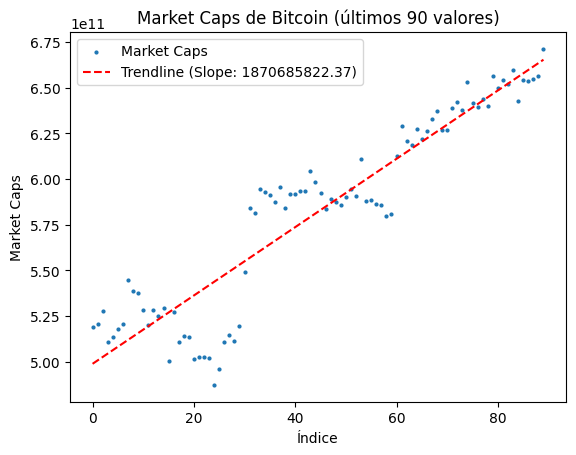

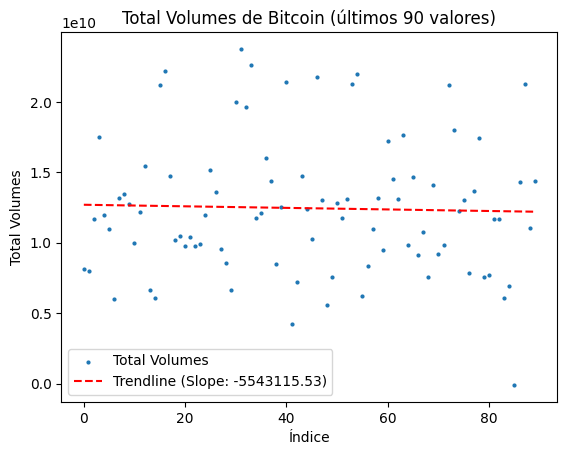

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = projected_df['prices'].tail(90)
last_90_market_caps = projected_df['market_caps'].tail(90)
last_90_total_volumes = projected_df['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()

__________________________________________

 ____ ______ _____ _____

_____________________________________________

_____________________________________________

_____________________________________________

_____________________________________________

_____________________________________________________________________________________

_____________________________________________________________________________________

_____________________________________________________________________________________

_____________________________________________________________________________________

# Otras pruebas; otra info input...

In [ ]:
import requests
import pandas as pd

def get_historical_data(currency='usd', days=30):
    url = f'https://api.coingecko.com/api/v3/coins/bitcoin/ohlc'
    params = {
        'vs_currency': currency,
        'days': days,
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error al hacer la solicitud: {e}")
        return None

def create_dataframe(data):
    if data is None or len(data) == 0:
        return None

    df = pd.DataFrame(data, columns=['close_timestamp', 'open_price', 'high_price', 'low_price', 'close_price'])
    df['close_timestamp'] = pd.to_datetime(df['close_timestamp'], unit='ms')  # Convertir el timestamp a formato de fecha
    return df

if __name__ == "__main__":
    # Obtener datos históricos de los últimos 30 días en dólares estadounidenses (USD)
    historical_data = get_historical_data(currency='usd', days=30)

    if historical_data:
        df = create_dataframe(historical_data)
        if df is not None:
            print(df)
        else:
            print("No se pudo crear el DataFrame.")
    else:
        print("No se pudo obtener la información histórica de Bitcoin.")



        close_timestamp  open_price  high_price  low_price  close_price
0   2023-06-19 16:00:00     26524.0     26524.0    26415.0      26415.0
1   2023-06-19 20:00:00     26437.0     26823.0    26437.0      26823.0
2   2023-06-20 00:00:00     26646.0     26759.0    26646.0      26759.0
3   2023-06-20 04:00:00     26779.0     26946.0    26779.0      26910.0
4   2023-06-20 08:00:00     26892.0     26941.0    26793.0      26793.0
..                  ...         ...         ...        ...          ...
176 2023-07-19 00:00:00     29720.0     29815.0    29720.0      29815.0
177 2023-07-19 04:00:00     29848.0     30050.0    29848.0      30014.0
178 2023-07-19 08:00:00     30061.0     30174.0    30039.0      30039.0
179 2023-07-19 12:00:00     30034.0     30034.0    29949.0      29986.0
180 2023-07-19 16:00:00     29999.0     29999.0    29951.0      29951.0

[181 rows x 5 columns]
